<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2003%20-%20Runge%20Kutta/302_4th%20Order%20Runge%20Kutta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Setting up Libraries

In [20]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


## Defining the function
\begin{equation}f(t,y)=t-y\end{equation}

In [21]:
def myfun_ty(t,y):
    return t-y

## Initial Setup
Defining the step size $h$ from the interval range $a\leq t \leq b$ and number of steps $N$
\begin{equation}h=\frac{b-a}{h}.\end{equation}
This gives the discrete time steps,
\begin{equation}t_{i}=t_0+ih,\end{equation}
where $t_0=a$.

In [22]:
# Start and end of interval
b=2
a=0
# Step size
N=4
h=(b-a)/(N)
t=np.arange(a,b+h,h)

## Setting up the initial conditions of the equation
\begin{equation}w_0=IC\end{equation}


In [23]:
# Initial Condition
IC=1
w=np.zeros(N+1)
y=(IC+1)*np.exp(-t)+t-1#np.zeros(N+1)
w[0]=IC

## 4th Order Runge Kutta 
\begin{equation}k_1=f(t,y),\end{equation}
\begin{equation}k_2=f(t+\frac{h}{2},y+\frac{h}{2}k_2),\end{equation}
\begin{equation}k_3=f(t+\frac{h}{2},y+\frac{h}{2}k_2),\end{equation}
\begin{equation}k_4=f(t+\frac{h}{2},y+\frac{h}{2}k_3),\end{equation}
\begin{equation}w_{i+1}=w_{i}+\frac{h}{6}(k_1+2k_2+2k_3+k_4).\end{equation}

In [24]:
for k in range (0,N):
    k1=myfun_ty(t[k],w[k])
    k2=myfun_ty(t[k]+h/2,w[k]+h/2*k1)
    k3=myfun_ty(t[k]+h/2,w[k]+h/2*k2)
    k4=myfun_ty(t[k]+h,w[k]+h*k3)
    w[k+1]=w[k]+h/6*(k1+2*k2+2*k3+k4)

## Plotting Results

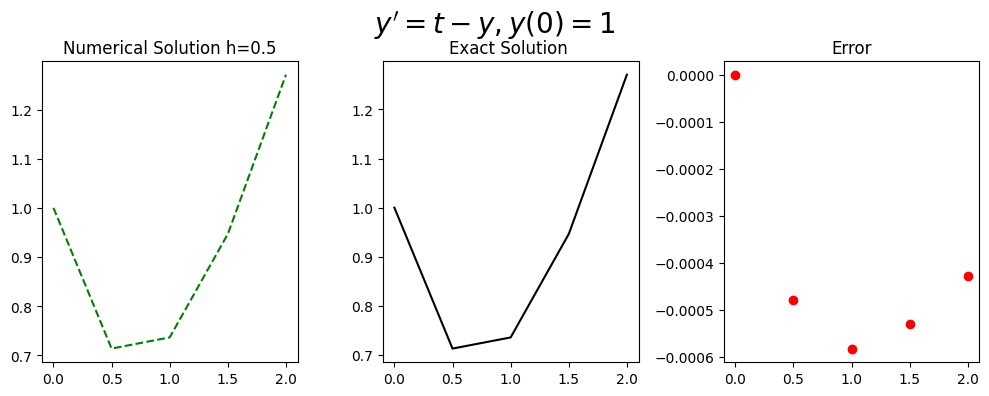

In [25]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='green')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,y,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,y-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$y'=t-y,   y(0)=%s$"%(IC), fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.85)    

In [26]:
import pandas as pd
d = {'time t_i': t, '4th Order Runge Kutta, w_i': w,'Exact':y,'Error |w-y|':np.round(np.abs(y-w),5)}
df = pd.DataFrame(data=d)
df

,time t_i,"4th Order Runge Kutta, w_i",Exact,Error |w-y|
0,0.0,1.000000,1.000000,0.00000
1,0.5,0.713542,0.713061,0.00048
2,1.0,0.736342,0.735759,0.00058
3,1.5,0.946791,0.946260,0.00053
4,2.0,1.271100,1.270671,0.00043


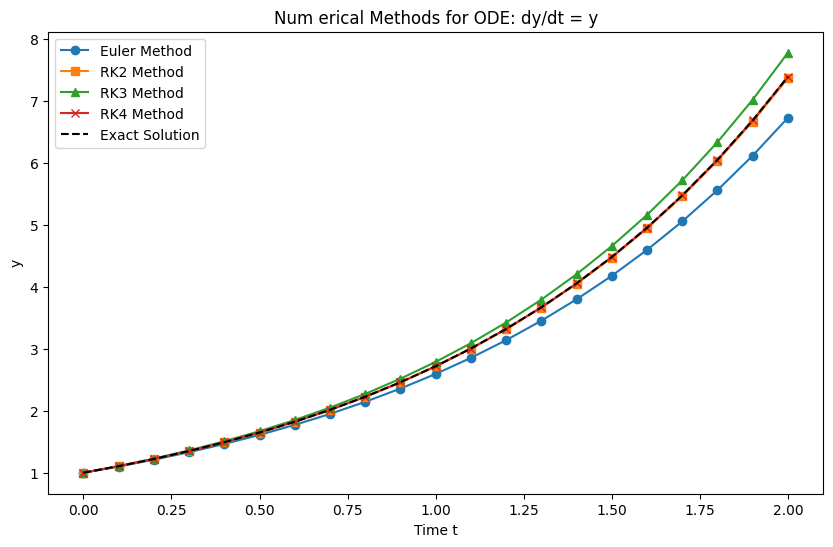

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE
def f(t, y):
    return y

# Parameters
y0 = 1  # Initial condition
t0 = 0  #
#Initial time
t_end = 2  # End time
h = 0.1  # Step size

# Time array
t = np.arange(t0, t_end + h, h)

# Euler Method
def euler_method(f, y0, t, h):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + h * f(t[i-1], y[i-1])
    return y

# RK2 Method
def rk2_method(f, y0, t, h):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = h * f(t[i-1], y[i-1])
        k2 = h * f(t[i-1] + h/2, y[i-1] + k1/2)
        y[i] = y[i-1] + k2
    return y

# RK3 Method
def rk3_method(f, y0, t, h):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = h * f(t[i-1], y[i-1])
        k2 = h * f(t[i-1] + h/3, y[i-1] + k1/3)
        k3 = h * f(t[i-1] + 2*h/3, y[i-1] - k1 + 2*k2)
        y[i] = y[i-1] + (k1 + 3*k3) / 4
    return y

# RK4 Method
def rk4_method(f, y0, t, h):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = h * f(t[i-1], y[i-1])
        k2 = h * f(t[i-1] + h/2, y[i-1] + k1/2)
        k3 = h * f(t[i-1] + h/2, y[i-1] + k2/2)
        k4 = h * f(t[i-1] + h, y[i-1] + k3)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

# Solve the ODE
euler_y = euler_method(f, y0, t, h)
rk2_y = rk2_method(f, y0, t, h)
rk3_y = rk3_method(f, y0, t, h)
rk4_y = rk4_method(f, y0, t, h)

# Exact solution for comparison
exact_y = np.exp(t)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, euler_y, 'o-', label='Euler Method')
plt.plot(t, rk2_y, 's-', label='RK2 Method')
plt.plot(t, rk3_y, '^-', label='RK3 Method')
plt.plot(t, rk4_y, 'x-', label='RK4 Method')
plt.plot(t, exact_y, 'k--', label='Exact Solution')
plt.xlabel('Time t')
plt.ylabel('y')
plt.title('Num erical Methods for ODE: dy/dt = y')
plt.legend()
#plt.grid(True)
plt.show()


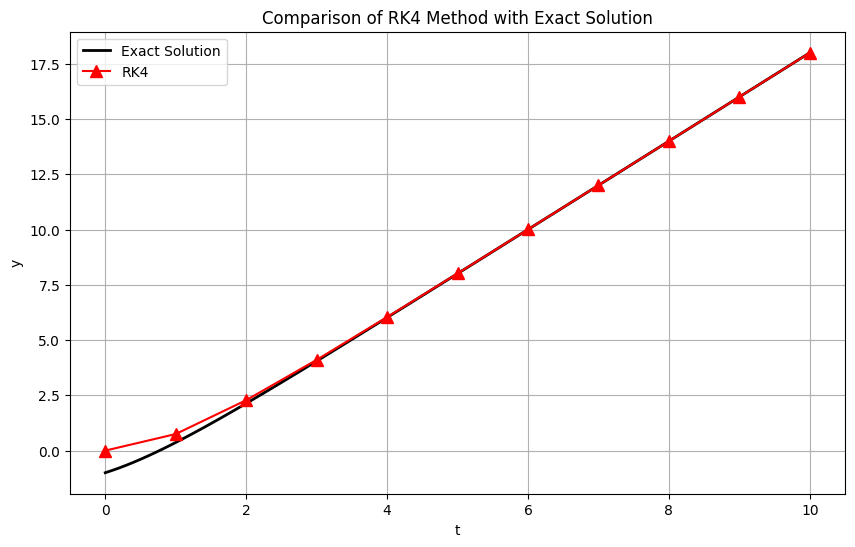

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Differential equation
def f(t, y):
    return 2*t - y

# Exact solution for comparison
def exact_solution(t):
    return 2*t - 2 + np.exp(-t)

# RK4 method
def rk4(f, y0, t0, t_end, N):
    h = (t_end - t0) / N
    t = np.linspace(t0, t_end, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for i in range(N):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2, y[i] + h/2 * k1)
        k3 = f(t[i] + h/2, y[i] + h/2 * k2)
        k4 = f(t[i] + h, y[i] + h * k3)
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return t, y

# Parameters
y0 = 0
t0 = 0
t_end = 10
N = 10

# Solve using RK4
t_rk4, y_rk4 = rk4(f, y0, t0, t_end, N)

# Exact solution for comparison
t_exact = np.linspace(t0, t_end, 100)
y_exact = exact_solution(t_exact)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, 'k-', label='Exact Solution', linewidth=2)
plt.plot(t_rk4, y_rk4, 'r^-', label='RK4', markersize=8)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparison of RK4 Method with Exact Solution')
plt.legend()
plt.grid(True)
plt.show()


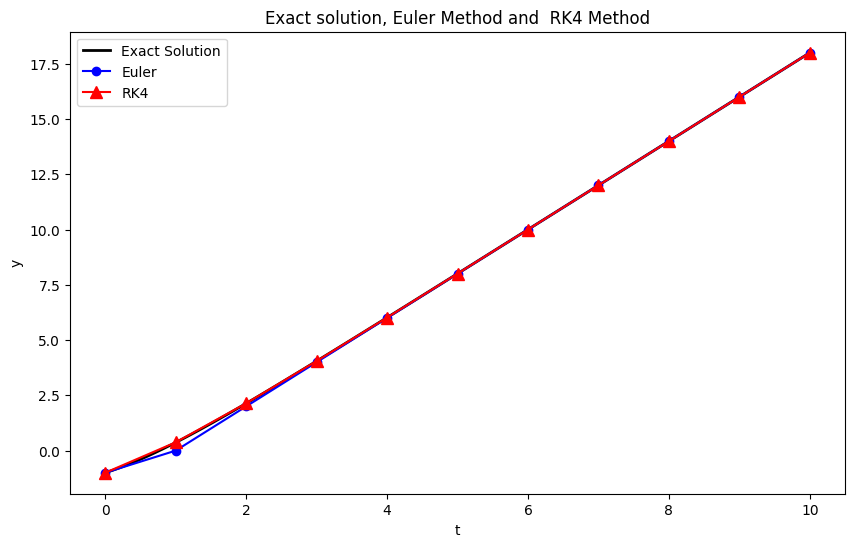

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Differential equation
def f(t, y):
    return 2*t - y

# Exact solution for comparison
def exact_solution(t):
    return 2*t - 2 + np.exp(-t)

# Euler method
def euler(f, y0, t0, t_end, N):
    h = (t_end - t0) / N
    t = np.linspace(t0, t_end, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for i in range(N):
        y[i+1] = y[i] + h * f(t[i], y[i])
    return t, y

# RK4 method
def rk4(f, y0, t0, t_end, N):
    h = (t_end - t0) / N
    t = np.linspace(t0, t_end, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for i in range(N):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2, y[i] + h/2 * k1)
        k3 = f(t[i] + h/2, y[i] + h/2 * k2)
        k4 = f(t[i] + h, y[i] + h * k3)
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return t, y

# Parameters
y0 = -1
t0 = 0
t_end = 10
N = 10

# Solve using Euler and RK4
t_euler, y_euler = euler(f, y0, t0, t_end, N)
t_rk4, y_rk4 = rk4(f, y0, t0, t_end, N)

# Exact solution for comparison
t_exact = np.linspace(t0, t_end, 100)
y_exact = exact_solution(t_exact)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, 'k-', label='Exact Solution', linewidth=2)
plt.plot(t_euler, y_euler, 'b-o', label='Euler', markersize=6)
plt.plot(t_rk4, y_rk4, 'r^-', label='RK4', markersize=8)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Exact solution, Euler Method and  RK4 Method')
plt.legend()
#plt.grid(True)
plt.show()


In [30]:
# Re-import necessary libraries and redefine the euler function
import numpy as np
import pandas as pd

# Euler method
def euler(f, y0, t0, t_end, N):
    h = (t_end - t0) / N
    t = np.linspace(t0, t_end, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for i in range(N):
        y[i+1] = y[i] + h * f(t[i], y[i])
    return t, y

# Differential equation
def f(t, y):
    return 2*t - y

# Exact solution for comparison
def exact_solution(t):
    return 2*t - 2 + np.exp(-t)

# RK4 method
def rk4(f, y0, t0, t_end, N):
    h = (t_end - t0) / N
    t = np.linspace(t0, t_end, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for i in range(N):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2, y[i] + h/2 * k1)
        k3 = f(t[i] + h/2, y[i] + h/2 * k2)
        k4 = f(t[i] + h, y[i] + h * k3)
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return t, y

# Parameters
y0 = -1
t0 = 0
t_end = 10
N = 10

# Solve using Euler and RK4 methods
t_euler, y_euler = euler(f, y0, t0, t_end, N)
t_rk4, y_rk4 = rk4(f, y0, t0, t_end, N)

# Exact solution for comparison
y_exact_at_euler = exact_solution(t_euler)
y_exact_at_rk4 = exact_solution(t_rk4)

# Calculate errors (Exact - RK4) and (Exact - Euler)
rk4_error = y_exact_at_rk4 - y_rk4
euler_error = y_exact_at_euler - y_euler

# Create a table with both errors
data = {
    "t": t_rk4,
    "Exact Solution": y_exact_at_rk4,
    "RK4 Method": y_rk4,
    "Euler Method": y_euler,
    "RK4 Error (Exact - RK4)": rk4_error,
    "Euler Error (Exact - Euler)": euler_error,
}

df = pd.DataFrame(data)
df


,t,Exact Solution,RK4 Method,Euler Method,RK4 Error (Exact - RK4),Euler Error (Exact - Euler)
0,0.0,-1.000000,-1.000000,-1.0,0.000000,0.000000
1,1.0,0.367879,0.375000,0.0,-0.007121,0.367879
2,2.0,2.135335,2.140625,2.0,-0.005290,0.135335
3,3.0,4.049787,4.052734,4.0,-0.002947,0.049787
4,4.0,6.018316,6.019775,6.0,-0.001460,0.018316
5,5.0,8.006738,8.007416,8.0,-0.000678,0.006738
6,6.0,10.002479,10.002781,10.0,-0.000302,0.002479
7,7.0,12.000912,12.001043,12.0,-0.000131,0.000912
8,8.0,14.000335,14.000391,14.0,-0.000056,0.000335
9,9.0,16.000123,16.000147,16.0,-0.000023,0.000123


In [31]:
#RK4 Error: The errors for the RK4 method are very small, showing high accuracy.
#Euler Error: The errors for the Euler method are larger, especially at the beginning, 
# eflecting its lower accuracy compared to RK4.


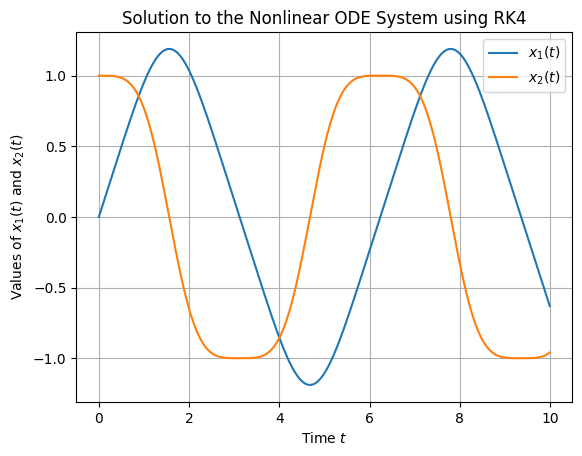

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the nonlinear system of ODEs
def system(t, x):
    dx1_dt = x[1]
    dx2_dt = -x[0]**3
    return np.array([dx1_dt, dx2_dt])

# Implement the RK4 method
def rk4(f, x0, t0, tf, h):
    t_values = np.arange(t0, tf, h)
    x_values = np.zeros((len(t_values), len(x0)))
    x_values[0] = x0
    
    for i in range(1, len(t_values)):
        t = t_values[i-1]
        x = x_values[i-1]
        
        k1 = h * f(t, x)
        k2 = h * f(t + h/2, x + k1/2)
        k3 = h * f(t + h/2, x + k2/2)
        k4 = h * f(t + h, x + k3)
        
        x_values[i] = x + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return t_values, x_values

# Initial conditions
x0 = [0, 1]  # Initial values for x1 and x2
t0 = 0       # Initial time
tf = 10      # Final time
h = 0.01     # Time step size

# Solve the system using RK4
t_values, x_values = rk4(system, x0, t0, tf, h)

# Plot the solution
plt.plot(t_values, x_values[:, 0], label='$x_1(t)$')
plt.plot(t_values, x_values[:, 1], label='$x_2(t)$')
plt.xlabel('Time $t$')
plt.ylabel('Values of $x_1(t)$ and $x_2(t)$')
plt.title('Solution to the Nonlinear ODE System using RK4')
plt.legend()
plt.grid(True)
plt.show()


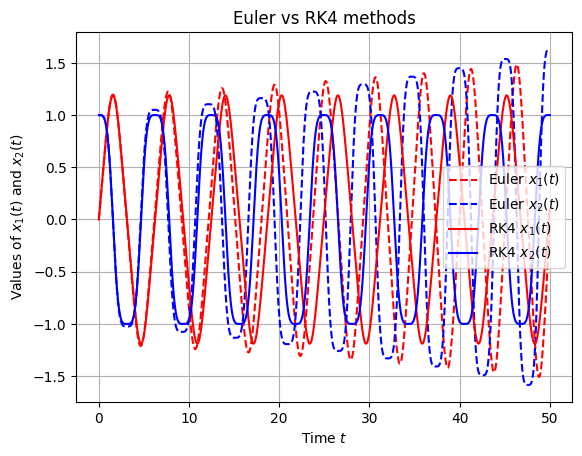

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define the nonlinear system of ODEs
def system(t, x):
    dx1_dt = x[1]
    dx2_dt = -x[0]**3
    return np.array([dx1_dt, dx2_dt])

# Implement the Euler method
def euler(f, x0, t0, tf, h):
    t_values = np.arange(t0, tf, h)
    x_values = np.zeros((len(t_values), len(x0)))
    x_values[0] = x0
    
    for i in range(1, len(t_values)):
        t = t_values[i-1]
        x = x_values[i-1]
        x_values[i] = x + h * f(t, x)
    
    return t_values, x_values

# Implement the RK4 method
def rk4(f, x0, t0, tf, h):
    t_values = np.arange(t0, tf, h)
    x_values = np.zeros((len(t_values), len(x0)))
    x_values[0] = x0
    
    for i in range(1, len(t_values)):
        t = t_values[i-1]
        x = x_values[i-1]
        
        k1 = h * f(t, x)
        k2 = h * f(t + h/2, x + k1/2)
        k3 = h * f(t + h/2, x + k2/2)
        k4 = h * f(t + h, x + k3)
        
        x_values[i] = x + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return t_values, x_values

# Initial conditions
x0 = [0, 1]  # Initial values for x1 and x2
t0 = 0       # Initial time
tf = 50     # Final time
h = 0.01     # Time step size

# Solve the system using Euler method
t_euler, x_euler = euler(system, x0, t0, tf, h)

# Solve the system using RK4 method
t_rk4, x_rk4 = rk4(system, x0, t0, tf, h)

# Plot the solutions for comparison

plt.plot(t_euler, x_euler[:, 0], label='Euler $x_1(t)$', linestyle='--', color='red')
plt.plot(t_euler, x_euler[:, 1], label='Euler $x_2(t)$', linestyle='--', color='blue')

plt.plot(t_rk4, x_rk4[:, 0], label='RK4 $x_1(t)$', color='red')
plt.plot(t_rk4, x_rk4[:, 1], label='RK4 $x_2(t)$', color='blue')

plt.xlabel('Time $t$')
plt.ylabel('Values of $x_1(t)$ and $x_2(t)$')
plt.title('Euler vs RK4 methods')
plt.legend()
plt.grid(True)
plt.show()


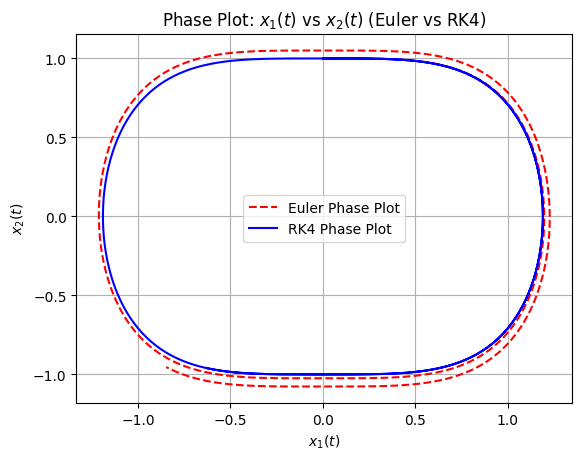

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define the nonlinear system of ODEs
def system(t, x):
    dx1_dt = x[1]
    dx2_dt = -x[0]**3
    return np.array([dx1_dt, dx2_dt])

# Implement the Euler method
def euler(f, x0, t0, tf, h):
    t_values = np.arange(t0, tf, h)
    x_values = np.zeros((len(t_values), len(x0)))
    x_values[0] = x0
    
    for i in range(1, len(t_values)):
        t = t_values[i-1]
        x = x_values[i-1]
        x_values[i] = x + h * f(t, x)
    
    return t_values, x_values

# Implement the RK4 method
def rk4(f, x0, t0, tf, h):
    t_values = np.arange(t0, tf, h)
    x_values = np.zeros((len(t_values), len(x0)))
    x_values[0] = x0
    
    for i in range(1, len(t_values)):
        t = t_values[i-1]
        x = x_values[i-1]
        
        k1 = h * f(t, x)
        k2 = h * f(t + h/2, x + k1/2)
        k3 = h * f(t + h/2, x + k2/2)
        k4 = h * f(t + h, x + k3)
        
        x_values[i] = x + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return t_values, x_values

# Initial conditions
x0 = [0, 1]  # Initial values for x1 and x2
t0 = 0       # Initial time
tf = 10      # Final time
h = 0.01     # Time step size

# Solve the system using Euler method
t_euler, x_euler = euler(system, x0, t0, tf, h)

# Solve the system using RK4 method
t_rk4, x_rk4 = rk4(system, x0, t0, tf, h)

# Plot phase plots for both methods
plt.plot(x_euler[:, 0], x_euler[:, 1], label='Euler Phase Plot', linestyle='--', color='red')
plt.plot(x_rk4[:, 0], x_rk4[:, 1], label='RK4 Phase Plot', color='blue')

plt.xlabel('$x_1(t)$')
plt.ylabel('$x_2(t)$')
plt.title('Phase Plot: $x_1(t)$ vs $x_2(t)$ (Euler vs RK4)')
plt.legend()
plt.grid(True)
plt.show()


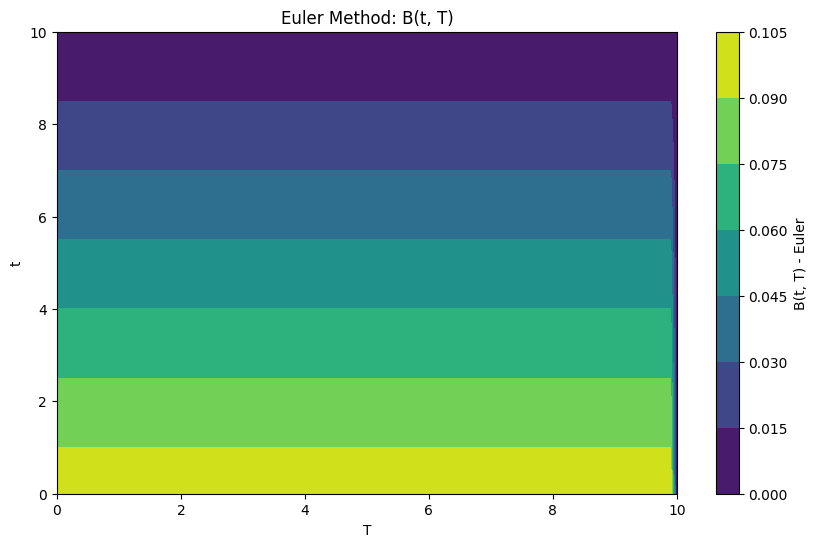

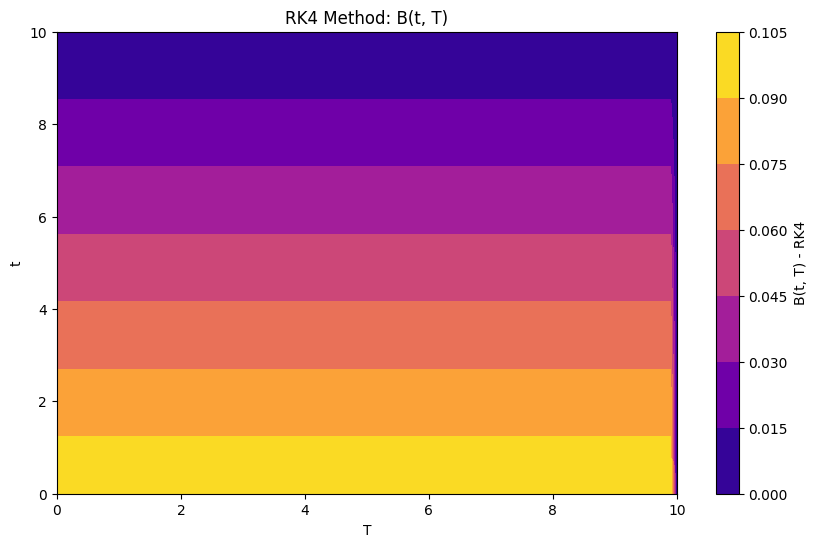

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
kappa = 0.5
theta = 0.02
r = 0.03
gamma = 2
sigma = 0.2
lambda_ = 0.1
rho = 0.5

# Discretization parameters
T_min, T_max = 0, 10  # Maturity time range
t_min, t_max = 0, 10  # Time range
N = 100  # Number of time steps
M = 100  # Number of space steps
dt = (t_max - t_min) / N
dT = (T_max - T_min) / M

# Initialize the grids
A_euler = np.zeros((N+1, M+1))  # A(t, T) matrix for Euler
B_euler = np.zeros((N+1, M+1))  # B(t, T) matrix for Euler
A_rk4 = np.zeros((N+1, M+1))    # A(t, T) matrix for RK4
B_rk4 = np.zeros((N+1, M+1))    # B(t, T) matrix for RK4

# Boundary conditions: A(T,T)=0 and B(T,T)=0
A_euler[:, -1] = 0
B_euler[:, -1] = 0
A_rk4[:, -1] = 0
B_rk4[:, -1] = 0

# Euler Method
for n in range(N-1, -1, -1):  # Time loop (backward in time)
    for i in range(M):
        A_euler[n, i] = A_euler[n+1, i] - dt * (kappa * theta * B_euler[n, i] + r * gamma)
        B_euler[n, i] = B_euler[n+1, i] + dt * (
            kappa * B_euler[n, i]
            - 0.5 * sigma**2 * B_euler[n, i]**2
            + 0.5 * gamma / (gamma - 1) * (lambda_ + rho * sigma * B_euler[n, i])**2
        )

# RK4 Method
for n in range(N-1, -1, -1):  # Time loop (backward in time)
    for i in range(M):
        # RK4 for A
        k1_A = - (kappa * theta * B_rk4[n, i] + r * gamma)
        k2_A = - (kappa * theta * (B_rk4[n, i] + dt/2 * k1_A) + r * gamma)
        k3_A = - (kappa * theta * (B_rk4[n, i] + dt/2 * k2_A) + r * gamma)
        k4_A = - (kappa * theta * (B_rk4[n, i] + dt * k3_A) + r * gamma)
        A_rk4[n, i] = A_rk4[n+1, i] + dt/6 * (k1_A + 2*k2_A + 2*k3_A + k4_A)

        # RK4 for B
        k1_B = kappa * B_rk4[n, i] - 0.5 * sigma**2 * B_rk4[n, i]**2 + 0.5 * gamma / (gamma-1) * (lambda_ + rho * sigma * B_rk4[n, i])**2
        k2_B = kappa * (B_rk4[n, i] + dt/2 * k1_B) - 0.5 * sigma**2 * (B_rk4[n, i] + dt/2 * k1_B)**2 + 0.5 * gamma / (gamma-1) * (lambda_ + rho * sigma * (B_rk4[n, i] + dt/2 * k1_B))**2
        k3_B = kappa * (B_rk4[n, i] + dt/2 * k2_B) - 0.5 * sigma**2 * (B_rk4[n, i] + dt/2 * k2_B)**2 + 0.5 * gamma / (gamma-1) * (lambda_ + rho * sigma * (B_rk4[n, i] + dt/2 * k2_B))**2
        k4_B = kappa * (B_rk4[n, i] + dt * k3_B) - 0.5 * sigma**2 * (B_rk4[n, i] + dt * k3_B)**2 + 0.5 * gamma / (gamma-1) * (lambda_ + rho * sigma * (B_rk4[n, i] + dt * k3_B))**2
        B_rk4[n, i] = B_rk4[n+1, i] + dt/6 * (k1_B + 2*k2_B + 2*k3_B + k4_B)

# Plot the results for B (Euler vs RK4)
T_vals = np.linspace(T_min, T_max, M+1)
t_vals = np.linspace(t_min, t_max, N+1)

plt.figure(figsize=(10, 6))
plt.contourf(T_vals, t_vals, B_euler, cmap='viridis')
plt.colorbar(label='B(t, T) - Euler')
plt.xlabel('T')
plt.ylabel('t')
plt.title('Euler Method: B(t, T)')
plt.show()

plt.figure(figsize=(10, 6))
plt.contourf(T_vals, t_vals, B_rk4, cmap='plasma')
plt.colorbar(label='B(t, T) - RK4')
plt.xlabel('T')
plt.ylabel('t')
plt.title('RK4 Method: B(t, T)')
plt.show()


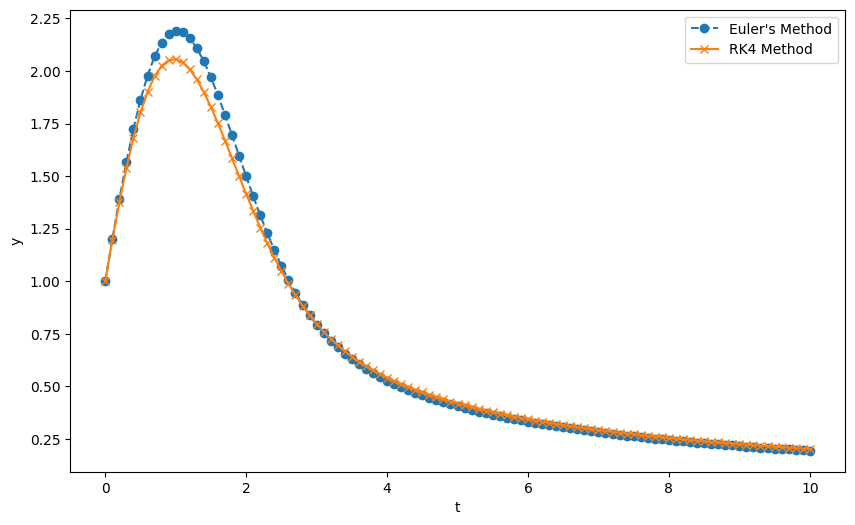

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation system
def f(t, y, u):
    return u

def g(t, y, u):
    return -t * u - y

# Euler's method
def euler_method(h, t0, y0, u0, t_max):
    n_steps = int(t_max / h) + 1
    t_values = np.linspace(t0, t_max, n_steps)
    y_values = np.zeros(n_steps)
    u_values = np.zeros(n_steps)
    
    y_values[0] = y0
    u_values[0] = u0
    
    for i in range(n_steps - 1):
        y_values[i+1] = y_values[i] + h * f(t_values[i], y_values[i], u_values[i])
        u_values[i+1] = u_values[i] + h * g(t_values[i], y_values[i], u_values[i])
    
    return t_values, y_values

# Runge-Kutta 4th order method (RK4)
def rk4_method(h, t0, y0, u0, t_max):
    n_steps = int(t_max / h) + 1
    t_values = np.linspace(t0, t_max, n_steps)
    y_values = np.zeros(n_steps)
    u_values = np.zeros(n_steps)
    
    y_values[0] = y0
    u_values[0] = u0
    
    for i in range(n_steps - 1):
        t = t_values[i]
        y = y_values[i]
        u = u_values[i]
        
        # RK4 steps
        k1_y = h * f(t, y, u)
        k1_u = h * g(t, y, u)
        
        k2_y = h * f(t + h/2, y + k1_y/2, u + k1_u/2)
        k2_u = h * g(t + h/2, y + k1_y/2, u + k1_u/2)
        
        k3_y = h * f(t + h/2, y + k2_y/2, u + k2_u/2)
        k3_u = h * g(t + h/2, y + k2_y/2, u + k2_u/2)
        
        k4_y = h * f(t + h, y + k3_y, u + k3_u)
        k4_u = h * g(t + h, y + k3_y, u + k3_u)
        
        y_values[i+1] = y + (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6
        u_values[i+1] = u + (k1_u + 2*k2_u + 2*k3_u + k4_u) / 6
    
    return t_values, y_values

# Parameters
h = 0.1
t0 = 0
y0 = 1
u0 = 2
t_max = 10

# Compute the solutions
t_euler, y_euler = euler_method(h, t0, y0, u0, t_max)
t_rk4, y_rk4 = rk4_method(h, t0, y0, u0, t_max)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler, label="Euler's Method", marker='o', linestyle='--')
plt.plot(t_rk4, y_rk4, label='RK4 Method', marker='x', linestyle='-')
plt.xlabel('t')
plt.ylabel('y')
#plt.title("Comparison of Euler's Method and RK4 for $y'' + ty' + y = 0$")
plt.legend()
#plt.grid(True)
plt.show()


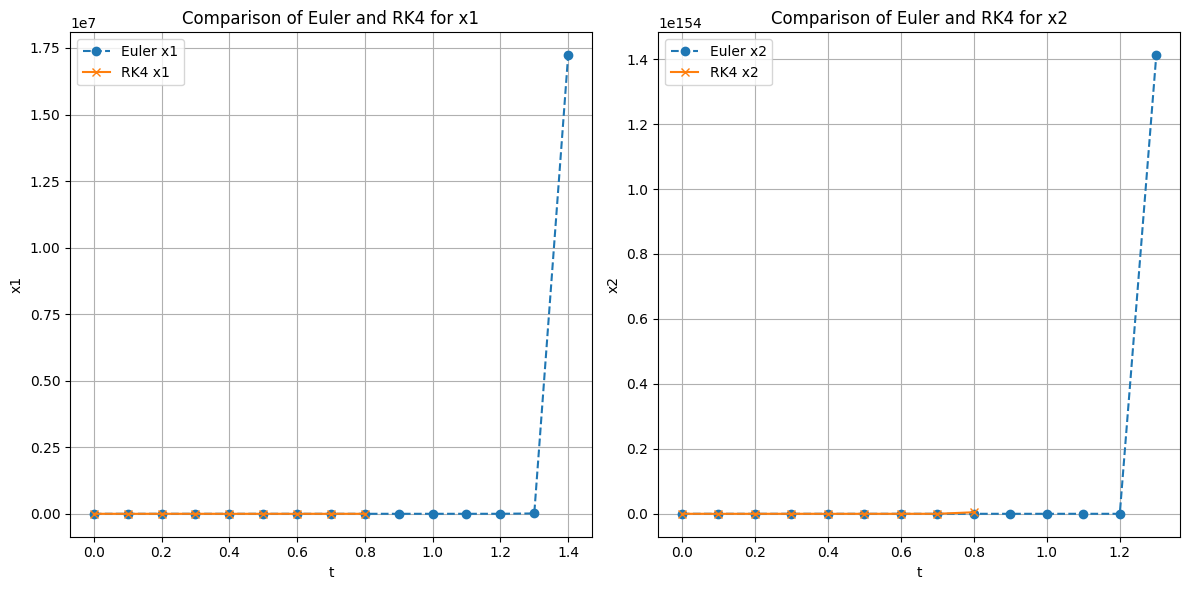

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of nonlinear ODEs
def f1(t, x1, x2):
    return x1**2 + np.sin(x2)

def f2(t, x1, x2):
    return np.exp(x1) - x2**3

# Euler's Method
def euler_method(f1, f2, t0, x1_0, x2_0, h, n_steps):
    t_values = [t0]
    x1_values = [x1_0]
    x2_values = [x2_0]
    
    for n in range(n_steps):
        t = t_values[-1]
        x1 = x1_values[-1]
        x2 = x2_values[-1]
        
        # Update using Euler's method
        x1_next = x1 + h * f1(t, x1, x2)
        x2_next = x2 + h * f2(t, x1, x2)
        
        t_values.append(t + h)
        x1_values.append(x1_next)
        x2_values.append(x2_next)
    
    return np.array(t_values), np.array(x1_values), np.array(x2_values)

# RK4 Method
def rk4_method(f1, f2, t0, x1_0, x2_0, h, n_steps):
    t_values = [t0]
    x1_values = [x1_0]
    x2_values = [x2_0]
    
    for n in range(n_steps):
        t = t_values[-1]
        x1 = x1_values[-1]
        x2 = x2_values[-1]
        
        # Compute RK4 coefficients
        k1_x1 = h * f1(t, x1, x2)
        k1_x2 = h * f2(t, x1, x2)
        
        k2_x1 = h * f1(t + h/2, x1 + k1_x1/2, x2 + k1_x2/2)
        k2_x2 = h * f2(t + h/2, x1 + k1_x1/2, x2 + k1_x2/2)
        
        k3_x1 = h * f1(t + h/2, x1 + k2_x1/2, x2 + k2_x2/2)
        k3_x2 = h * f2(t + h/2, x1 + k2_x1/2, x2 + k2_x2/2)
        
        k4_x1 = h * f1(t + h, x1 + k3_x1, x2 + k3_x2)
        k4_x2 = h * f2(t + h, x1 + k3_x1, x2 + k3_x2)
        
        # Update using RK4 method
        x1_next = x1 + (1/6) * (k1_x1 + 2*k2_x1 + 2*k3_x1 + k4_x1)
        x2_next = x2 + (1/6) * (k1_x2 + 2*k2_x2 + 2*k3_x2 + k4_x2)
        
        t_values.append(t + h)
        x1_values.append(x1_next)
        x2_values.append(x2_next)
    
    return np.array(t_values), np.array(x1_values), np.array(x2_values)

# Initial conditions and parameters
t0 = 0.0
x1_0 = 1.0  # Initial condition for x1
x2_0 = 0.5  # Initial condition for x2
h = 0.1     # Step size
n_steps = 1000  # Number of steps

# Solve using Euler and RK4 methods
t_euler, x1_euler, x2_euler = euler_method(f1, f2, t0, x1_0, x2_0, h, n_steps)
t_rk4, x1_rk4, x2_rk4 = rk4_method(f1, f2, t0, x1_0, x2_0, h, n_steps)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot for x1
plt.subplot(1, 2, 1)
plt.plot(t_euler, x1_euler, label="Euler x1", marker='o', linestyle='--')
plt.plot(t_rk4, x1_rk4, label="RK4 x1", marker='x', linestyle='-')
plt.xlabel('t')
plt.ylabel('x1')
plt.title("Comparison of Euler and RK4 for x1")
plt.legend()
plt.grid(True)

# Plot for x2
plt.subplot(1, 2, 2)
plt.plot(t_euler, x2_euler, label="Euler x2", marker='o', linestyle='--')
plt.plot(t_rk4, x2_rk4, label="RK4 x2", marker='x', linestyle='-')
plt.xlabel('t')
plt.ylabel('x2')
plt.title("Comparison of Euler and RK4 for x2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


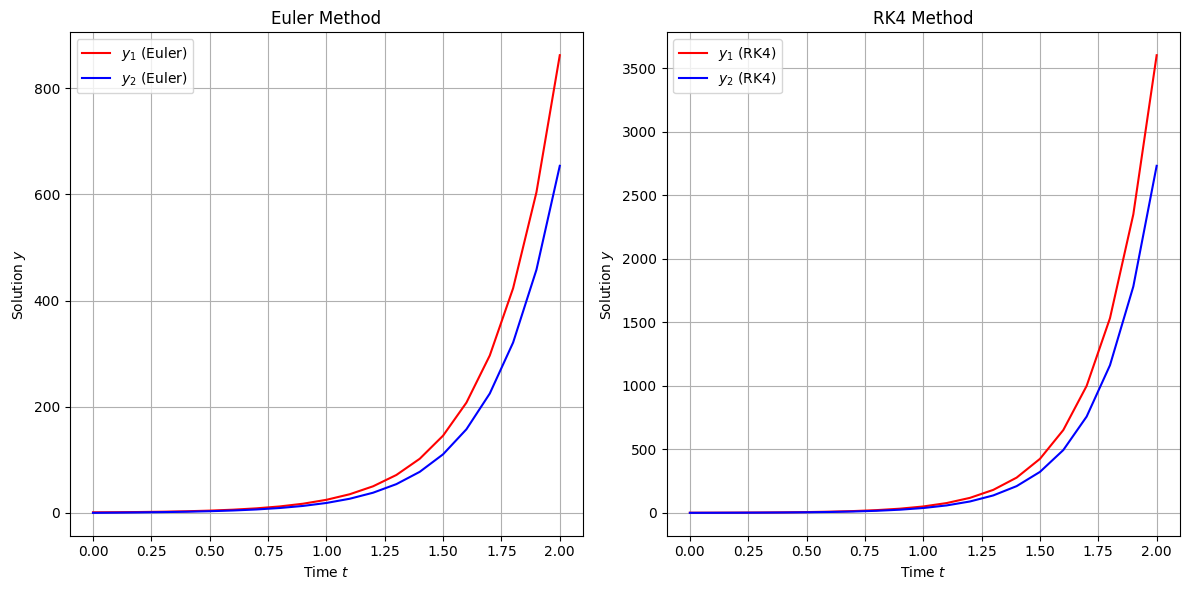

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of ODEs
def f(t, y):
    return np.array([
        2 * y[0] + 3 * y[1],
        4 * y[0] - y[1]
    ])

# Euler method
def euler_method(y0, t0, tf, h):
    num_steps = int((tf - t0) / h)
    t = np.linspace(t0, tf, num_steps + 1)
    y = np.zeros((num_steps + 1, len(y0)))
    y[0] = y0
    
    for k in range(num_steps):
        y[k + 1] = y[k] + h * f(t[k], y[k])
    
    return t, y

# RK4 method
def rk4_method(y0, t0, tf, h):
    num_steps = int((tf - t0) / h)
    t = np.linspace(t0, tf, num_steps + 1)
    y = np.zeros((num_steps + 1, len(y0)))
    y[0] = y0
    
    for k in range(num_steps):
        t_k = t[k]
        y_k = y[k]
        k1 = f(t_k, y_k)
        k2 = f(t_k + h / 2, y_k + h / 2 * k1)
        k3 = f(t_k + h / 2, y_k + h / 2 * k2)
        k4 = f(t_k + h, y_k + h * k3)
        y[k + 1] = y_k + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return t, y

# Parameters
y0 = np.array([1, 0])   # Initial conditions
t0 = 0                 # Start time
tf = 2                 # End time
h = 0.1                # Step size

# Solve the system using Euler method
t_euler, y_euler = euler_method(y0, t0, tf, h)

# Solve the system using RK4 method
t_rk4, y_rk4 = rk4_method(y0, t0, tf, h)

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_euler, y_euler[:, 0], 'r-', label='$y_1$ (Euler)')
plt.plot(t_euler, y_euler[:, 1], 'b-', label='$y_2$ (Euler)')
plt.title('Euler Method')
plt.xlabel('Time $t$')
plt.ylabel('Solution $y$')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t_rk4, y_rk4[:, 0], 'r-', label='$y_1$ (RK4)')
plt.plot(t_rk4, y_rk4[:, 1], 'b-', label='$y_2$ (RK4)')
plt.title('RK4 Method')
plt.xlabel('Time $t$')
plt.ylabel('Solution $y$')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


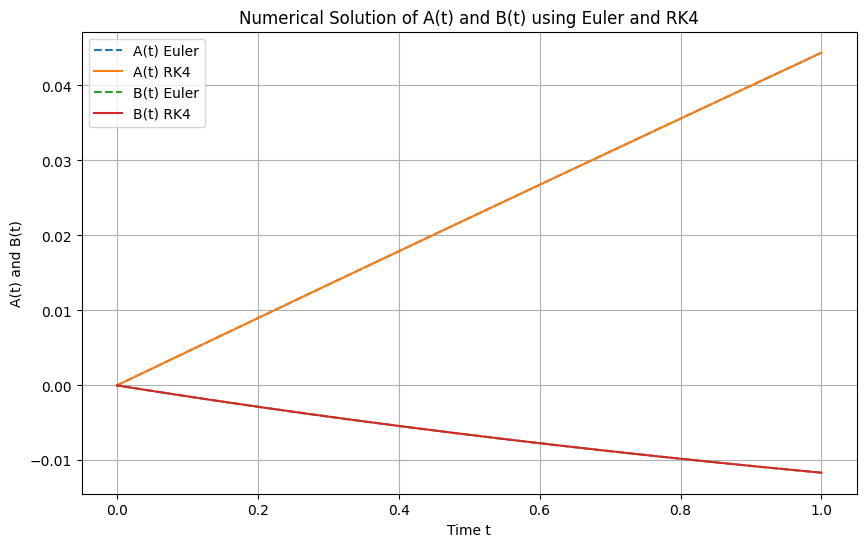

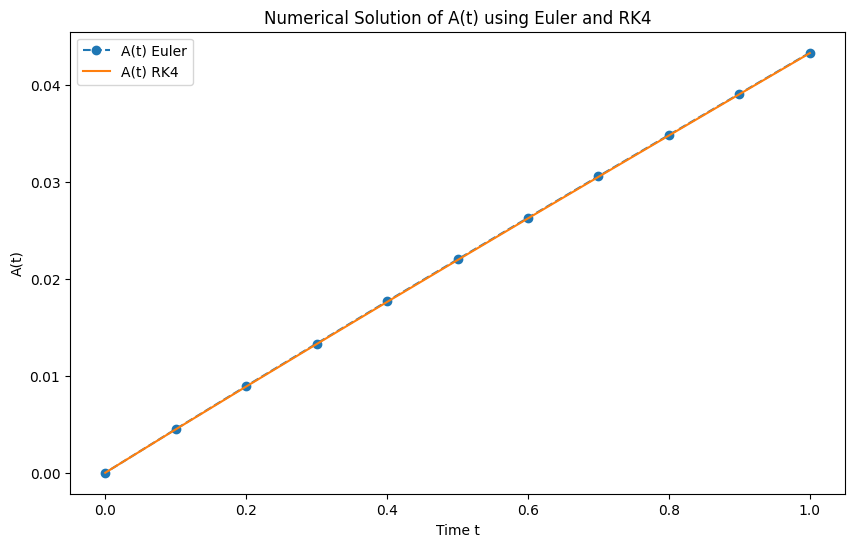

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (these can be modified as needed)
kappa = 2
theta = 0.2
r = 0.03
gamma = 1.5
sigma = 0.2
lambda_ = 0.1
rho = 0.5

# Time settings
T = 1.0    # final time
t0 = 0.0   # start time
N = 10   # number of time steps
h = (T - t0) / N  # time step size
time = np.linspace(T, t0, N+1)  # time grid

# Initialize arrays for A(t) and B(t)
A_euler = np.zeros(N+1)
B_euler = np.zeros(N+1)
A_rk4 = np.zeros(N+1)
B_rk4 = np.zeros(N+1)

# Boundary conditions
A_euler[-1] = 0
B_euler[-1] = 0
A_rk4[-1] = 0
B_rk4[-1] = 0

# Define derivatives for A(t) and B(t)
def dA_dt(B):
    return -kappa * theta * B - r * gamma

def dB_dt(B):
    return kappa * B - 0.5 * sigma**2 * B**2 + (gamma / (2 * (gamma - 1))) * (lambda_ + rho * sigma * B)**2

# Euler Method
for i in range(N-1, -1, -1):
    A_euler[i] = A_euler[i+1] - h * dA_dt(B_euler[i+1])
    B_euler[i] = B_euler[i+1] - h * dB_dt(B_euler[i+1])

# RK4 Method
for i in range(N-1, -1, -1):
    # For A(t)
    k1_A = dA_dt(B_rk4[i+1])
    k1_B = dB_dt(B_rk4[i+1])
    
    k2_A = dA_dt(B_rk4[i+1] - h/2 * k1_B)
    k2_B = dB_dt(B_rk4[i+1] - h/2 * k1_B)
    
    k3_A = dA_dt(B_rk4[i+1] - h/2 * k2_B)
    k3_B = dB_dt(B_rk4[i+1] - h/2 * k2_B)
    
    k4_A = dA_dt(B_rk4[i+1] - h * k3_B)
    k4_B = dB_dt(B_rk4[i+1] - h * k3_B)
    
    A_rk4[i] = A_rk4[i+1] - h/6 * (k1_A + 2*k2_A + 2*k3_A + k4_A)
    B_rk4[i] = B_rk4[i+1] - h/6 * (k1_B + 2*k2_B + 2*k3_B + k4_B)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, A_euler, label='A(t) Euler',marker='o',linestyle='--')
plt.plot(time, A_rk4, label='A(t) RK4', linestyle='-')
plt.xlabel('Time t')
plt.ylabel('A(t)')
plt.title('Numerical Solution of A(t) using Euler and RK4')
plt.legend()
#plt.grid(True)
plt.show()


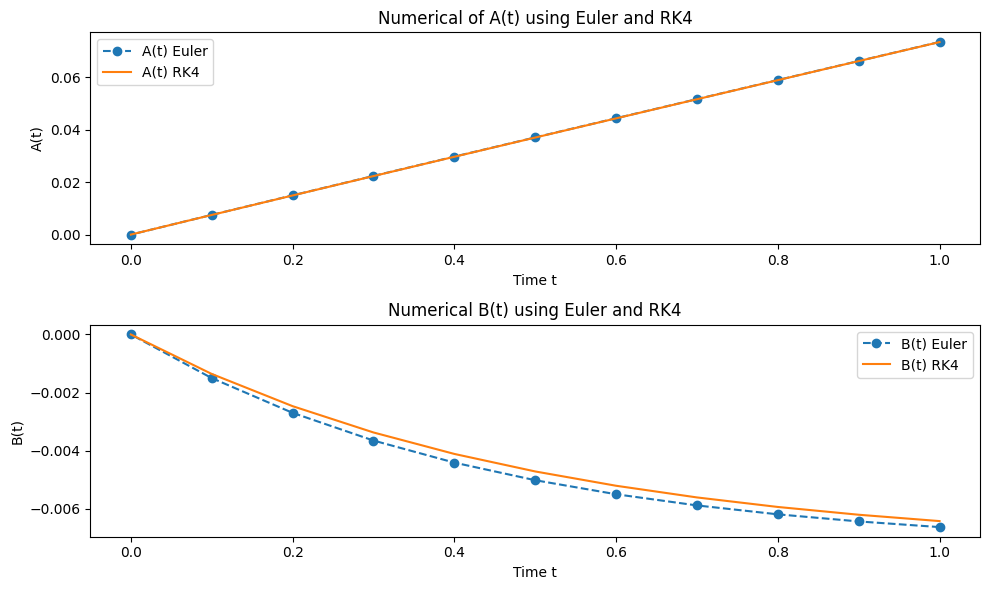

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (these can be modified as needed)
kappa = 2
theta = 0.2
r = 0.05
gamma = 1.5
sigma = 0.2
lambda_ = 0.1
rho = 0.5

# Time settings
T = 1.0  # final time
t0 = 0.0  # start time
N = 10  # number of time steps
h = (T - t0) / N  # time step size
time = np.linspace(T, t0, N + 1)  # time grid

# Initialize arrays for A(t) and B(t)
A_euler = np.zeros(N + 1)
B_euler = np.zeros(N + 1)
A_rk4 = np.zeros(N + 1)
B_rk4 = np.zeros(N + 1)

# Boundary conditions
A_euler[-1] = 0
B_euler[-1] = 0
A_rk4[-1] = 0
B_rk4[-1] = 0


# Define derivatives for A(t) and B(t)
def dA_dt(B):
    return -kappa * theta * B - r * gamma


def dB_dt(B):
    return (
        kappa * B
        - 0.5 * sigma**2 * B**2
        + (gamma / (2 * (gamma - 1))) * (lambda_ + rho * sigma * B) ** 2.0
    )


# Euler Method
for i in range(N - 1, -1, -1):
    A_euler[i] = A_euler[i + 1] - h * dA_dt(B_euler[i + 1])
    B_euler[i] = B_euler[i + 1] - h * dB_dt(B_euler[i + 1])

# RK4 Method
for i in range(N - 1, -1, -1):
    # For A(t)
    k1_A = dA_dt(B_rk4[i + 1])
    k1_B = dB_dt(B_rk4[i + 1])

    k2_A = dA_dt(B_rk4[i + 1] - h / 2 * k1_B)
    k2_B = dB_dt(B_rk4[i + 1] - h / 2 * k1_B)

    k3_A = dA_dt(B_rk4[i + 1] - h / 2 * k2_B)
    k3_B = dB_dt(B_rk4[i + 1] - h / 2 * k2_B)

    k4_A = dA_dt(B_rk4[i + 1] - h * k3_B)
    k4_B = dB_dt(B_rk4[i + 1] - h * k3_B)

    A_rk4[i] = A_rk4[i + 1] - h / 6 * (k1_A + 2 * k2_A + 2 * k3_A + k4_A)
    B_rk4[i] = B_rk4[i + 1] - h / 6 * (k1_B + 2 * k2_B + 2 * k3_B + k4_B)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot A(t)
plt.subplot(2, 1, 1)
plt.plot(time, A_euler, label="A(t) Euler", marker="o", linestyle="--")
plt.plot(time, A_rk4, label="A(t) RK4", linestyle="-")
plt.xlabel("Time t")
plt.ylabel("A(t)")
plt.title("Numerical of A(t) using Euler and RK4")
plt.legend()
# plt.grid(True)

# Plot B(t)
plt.subplot(2, 1, 2)
plt.plot(time, B_euler, label="B(t) Euler", marker="o", linestyle="--")
plt.plot(time, B_rk4, label="B(t) RK4", linestyle="-")
plt.xlabel("Time t")
plt.ylabel("B(t)")
plt.title("Numerical B(t) using Euler and RK4")
plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.show()

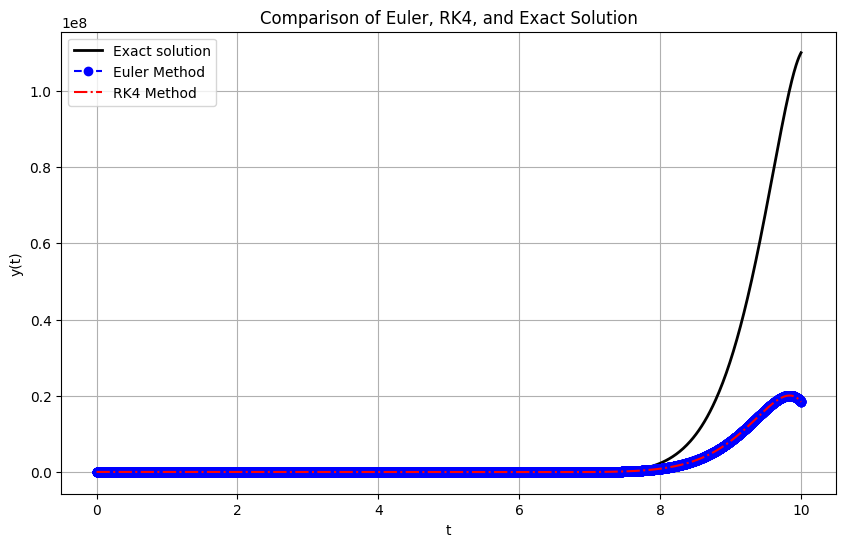

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the exact solution
def exact_solution(t):
    return (1/5) * np.exp(2*t) * (np.sin(t) - 2*np.cos(t))

# Define the system of ODEs: y' = u, u' = e^{2t}sin(t) - 2u + 2y
def f(t, y, u):
    return u

def g(t, y, u):
    return np.exp(2*t) * np.sin(t) - 2*u + 2*y

# Euler Method
def euler_method(h, t0, y0, u0, t_end):
    n_steps = int((t_end - t0) / h)
    t_values = np.linspace(t0, t_end, n_steps + 1)
    y_values = np.zeros(n_steps + 1)
    u_values = np.zeros(n_steps + 1)
    
    # Initial conditions
    y_values[0] = y0
    u_values[0] = u0
    
    for n in range(n_steps):
        t = t_values[n]
        y = y_values[n]
        u = u_values[n]
        
        y_values[n + 1] = y + h * f(t, y, u)
        u_values[n + 1] = u + h * g(t, y, u)
    
    return t_values, y_values

# RK4 Method
def rk4_method(h, t0, y0, u0, t_end):
    n_steps = int((t_end - t0) / h)
    t_values = np.linspace(t0, t_end, n_steps + 1)
    y_values = np.zeros(n_steps + 1)
    u_values = np.zeros(n_steps + 1)
    
    # Initial conditions
    y_values[0] = y0
    u_values[0] = u0
    
    for n in range(n_steps):
        t = t_values[n]
        y = y_values[n]
        u = u_values[n]
        
        k1_y = h * f(t, y, u)
        k1_u = h * g(t, y, u)
        
        k2_y = h * f(t + h/2, y + k1_y/2, u + k1_u/2)
        k2_u = h * g(t + h/2, y + k1_y/2, u + k1_u/2)
        
        k3_y = h * f(t + h/2, y + k2_y/2, u + k2_u/2)
        k3_u = h * g(t + h/2, y + k2_y/2, u + k2_u/2)
        
        k4_y = h * f(t + h, y + k3_y, u + k3_u)
        k4_u = h * g(t + h, y + k3_y, u + k3_u)
        
        y_values[n + 1] = y + (1/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)
        u_values[n + 1] = u + (1/6) * (k1_u + 2*k2_u + 2*k3_u + k4_u)
    
    return t_values, y_values

# Parameters
h = 0.001  # step size
t0 = 0    # initial time
y0 = -0.4 # initial value of y
u0 = -0.6 # initial value of y'
t_end = 10 # end time

# Solve using Euler method
t_euler, y_euler = euler_method(h, t0, y0, u0, t_end)

# Solve using RK4 method
t_rk4, y_rk4 = rk4_method(h, t0, y0, u0, t_end)

# Exact solution
t_exact = np.linspace(t0, t_end, 1000)
y_exact = exact_solution(t_exact)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, label='Exact solution', color='black', linewidth=2)
plt.plot(t_euler, y_euler, label='Euler Method',marker='o', linestyle='--', color='blue')
plt.plot(t_rk4, y_rk4, label='RK4 Method', linestyle='-.', color='red')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparison of Euler, RK4, and Exact Solution')
plt.legend()
plt.grid(True)
plt.show()


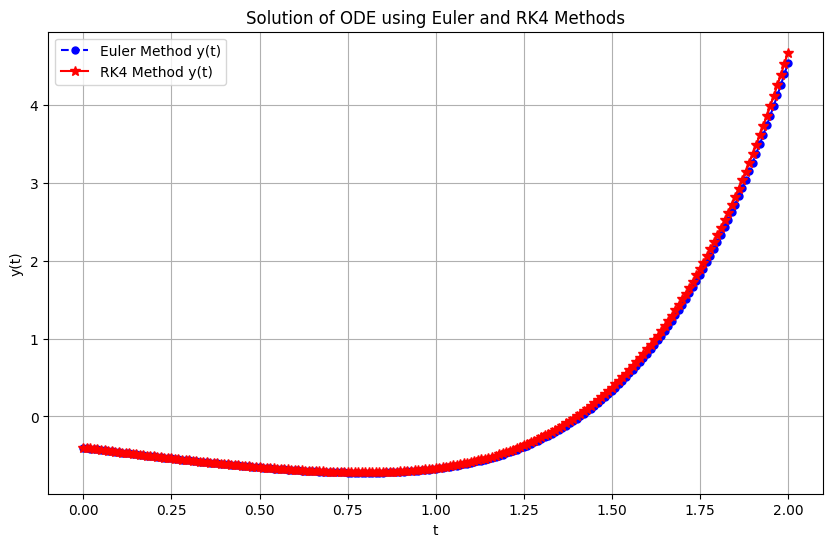

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of equations
def f(t, y1, y2):
    dydt1 = y2
    dydt2 = np.exp(2*t) * np.sin(t) - 2*y2 + 2*y1
    return dydt1, dydt2

# Euler's Method
def euler_method(h, t0, t_end, y1_0, y2_0):
    steps = int((t_end - t0) / h) + 1
    t = np.linspace(t0, t_end, steps)
    y1 = np.zeros(steps)
    y2 = np.zeros(steps)
    
    # Initial conditions
    y1[0] = y1_0
    y2[0] = y2_0
    
    for n in range(steps - 1):
        dydt1, dydt2 = f(t[n], y1[n], y2[n])
        y1[n+1] = y1[n] + h * dydt1
        y2[n+1] = y2[n] + h * dydt2
    
    return t, y1, y2

# Runge-Kutta 4th Order Method
def rk4_method(h, t0, t_end, y1_0, y2_0):
    steps = int((t_end - t0) / h) + 1
    t = np.linspace(t0, t_end, steps)
    y1 = np.zeros(steps)
    y2 = np.zeros(steps)
    
    # Initial conditions
    y1[0] = y1_0
    y2[0] = y2_0
    
    for n in range(steps - 1):
        k11, k12 = f(t[n], y1[n], y2[n])
        k21, k22 = f(t[n] + h/2, y1[n] + h/2*k11, y2[n] + h/2*k12)
        k31, k32 = f(t[n] + h/2, y1[n] + h/2*k21, y2[n] + h/2*k22)
        k41, k42 = f(t[n] + h, y1[n] + h*k31, y2[n] + h*k32)
        
        y1[n+1] = y1[n] + (h/6)*(k11 + 2*k21 + 2*k31 + k41)
        y2[n+1] = y2[n] + (h/6)*(k12 + 2*k22 + 2*k32 + k42)
    
    return t, y1, y2

# Parameters
h = 0.01
t0 = 0
t_end = 2
y1_0 = -0.4
y2_0 = -0.6

# Solve using Euler's method
t_euler, y1_euler, y2_euler = euler_method(h, t0, t_end, y1_0, y2_0)

# Solve using RK4 method
t_rk4, y1_rk4, y2_rk4 = rk4_method(h, t0, t_end, y1_0, y2_0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y1_euler, 'bo--', label='Euler Method y(t)', markersize=5)
plt.plot(t_rk4, y1_rk4, 'r*-', label='RK4 Method y(t)', markersize=7)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution of ODE using Euler and RK4 Methods')
plt.legend()
plt.grid(True)
plt.show()


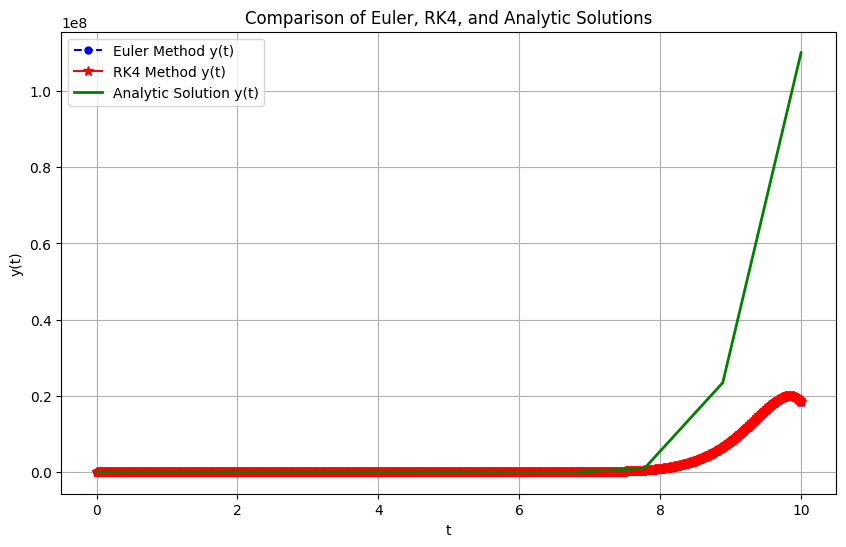

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of equations
def f(t, y1, y2):
    dydt1 = y2
    dydt2 = np.exp(2*t) * np.sin(t) - 2*y2 + 2*y1
    return dydt1, dydt2

# Euler's Method
def euler_method(h, t0, t_end, y1_0, y2_0):
    steps = int((t_end - t0) / h) + 1
    t = np.linspace(t0, t_end, steps)
    y1 = np.zeros(steps)
    y2 = np.zeros(steps)
    
    # Initial conditions
    y1[0] = y1_0
    y2[0] = y2_0
    
    for n in range(steps - 1):
        dydt1, dydt2 = f(t[n], y1[n], y2[n])
        y1[n+1] = y1[n] + h * dydt1
        y2[n+1] = y2[n] + h * dydt2
    
    return t, y1, y2

# Runge-Kutta 4th Order Method
def rk4_method(h, t0, t_end, y1_0, y2_0):
    steps = int((t_end - t0) / h) + 1
    t = np.linspace(t0, t_end, steps)
    y1 = np.zeros(steps)
    y2 = np.zeros(steps)
    
    # Initial conditions
    y1[0] = y1_0
    y2[0] = y2_0
    
    for n in range(steps - 1):
        k11, k12 = f(t[n], y1[n], y2[n])
        k21, k22 = f(t[n] + h/2, y1[n] + h/2*k11, y2[n] + h/2*k12)
        k31, k32 = f(t[n] + h/2, y1[n] + h/2*k21, y2[n] + h/2*k22)
        k41, k42 = f(t[n] + h, y1[n] + h*k31, y2[n] + h*k32)
        
        y1[n+1] = y1[n] + (h/6)*(k11 + 2*k21 + 2*k31 + k41)
        y2[n+1] = y2[n] + (h/6)*(k12 + 2*k22 + 2*k32 + k42)
    
    return t, y1, y2

# Analytic solution y(t) = (1/5) * e^(2t) * (sin(t) - 2*cos(t))
def analytic_solution(t):
    return (1/5) * np.exp(2*t) * (np.sin(t) - 2*np.cos(t))

# Parameters
h = 0.01
t0 = 0
t_end = 10
y1_0 = -0.4
y2_0 = -0.6

# Solve using Euler's method
t_euler, y1_euler, y2_euler = euler_method(h, t0, t_end, y1_0, y2_0)

# Solve using RK4 method
t_rk4, y1_rk4, y2_rk4 = rk4_method(h, t0, t_end, y1_0, y2_0)

# Compute the analytic solution
t_analytic = np.linspace(t0, t_end, 10)
y_analytic = analytic_solution(t_analytic)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y1_euler, 'bo--', label='Euler Method y(t)', markersize=5)
plt.plot(t_rk4, y1_rk4, 'r*-', label='RK4 Method y(t)', markersize=7)
plt.plot(t_analytic, y_analytic, 'g-', label='Analytic Solution y(t)', linewidth=2)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparison of Euler, RK4, and Analytic Solutions')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Black-Scholes formula for call option price
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Parameters
K = 100  # Strike price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

# Generate data
S = np.linspace(50, 150, 100)
T = np.linspace(0.01, 1, 100)
S, T = np.meshgrid(S, T)
C = black_scholes_call(S, K, T, r, sigma)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S, T, C, cmap='viridis')

# Labels
ax.set_xlabel('Asset Price (S)')
ax.set_ylabel('Time to Maturity (T)')
ax.set_zlabel('Call Option Price (C)')
ax.set_title('Black-Scholes Call Option Price Surface')

plt.show()


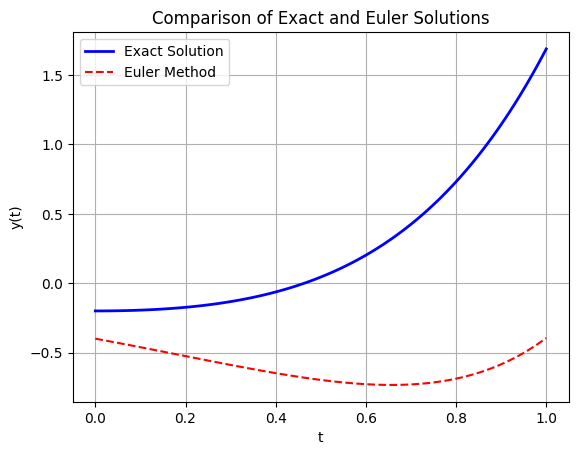

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Exact solution
def exact_solution(t):
    return np.exp(2*t) * (-1/5 * np.cos(t) + 2/5 * np.sin(t))

# Derivatives for Euler method
def f1(t, y1, y2):
    return y2

def f2(t, y1, y2):
    return 2*y2 - 2*y1 + np.exp(2*t) * np.sin(t)

# Euler method
def euler_method(t0, y10, y20, h, n):
    t_values = np.linspace(t0, t0 + n*h, n+1)
    y1_values = np.zeros(n+1)
    y2_values = np.zeros(n+1)
    y1_values[0], y2_values[0] = y10, y20
    
    for i in range(n):
        y1_values[i+1] = y1_values[i] + h * f1(t_values[i], y1_values[i], y2_values[i])
        y2_values[i+1] = y2_values[i] + h * f2(t_values[i], y1_values[i], y2_values[i])
    
    return t_values, y1_values

# Initial conditions and parameters
t0, y10, y20 = 0, -0.4, -0.6
h = 0.01
n = int(1/h)

# Compute solutions
t_values = np.linspace(t0, t0 + n*h, n+1)
exact_values = exact_solution(t_values)
t_euler, y_euler = euler_method(t0, y10, y20, h, n)

# Plot solutions
plt.plot(t_values, exact_values, label="Exact Solution", color='blue', linewidth=2)
plt.plot(t_euler, y_euler, label="Euler Method", color='red', linestyle='--')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparison of Exact and Euler Solutions')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# Compute the difference between exact solution and Euler method
difference = exact_values - y_euler

# Create a table of t, y_exact, y_euler, and the difference
table_data = np.column_stack((t_values, exact_values, y_euler, difference))

# Create headers for the table
headers = ["t", "y_exact", "y_euler", "y_exact - y_euler"]

# Display the table
import pandas as pd
df = pd.DataFrame(table_data, columns=headers)
df


,t,y_exact,y_euler,y_exact - y_euler
0,0.0,-0.200000,-0.400000,0.200000
1,0.1,-0.194285,-0.460000,0.265715
2,0.2,-0.173866,-0.524000,0.350134
3,0.3,-0.132758,-0.590381,0.457622
4,0.4,-0.063305,-0.656594,0.593288
5,0.5,0.044182,-0.718857,0.763039
6,0.6,0.201829,-0.771774,0.973604
7,0.7,0.424655,-0.807866,1.232521
8,0.8,0.731073,-0.816993,1.548066
9,0.9,1.143436,-0.785665,1.929101


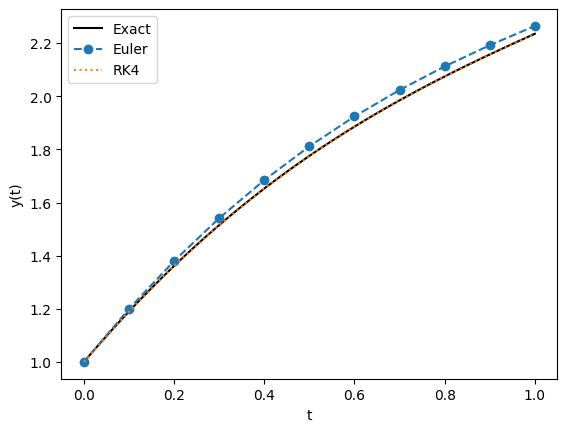

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Exact solution
def exact_solution(t):
    return np.exp(-t/2) * (2/3 * np.cos(np.sqrt(3)/2 * t) + 4*np.sqrt(3)/3 * np.sin(np.sqrt(3)/2 * t)) + np.exp(t)/3

# ODE system for y' = z, z' = e^t - z - y
def odes(t, y):
    return [y[1], np.exp(t) - y[0] - y[1]]

# Euler's method
def euler_method(f, t_span, y0, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = np.zeros((len(t_values), 2))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h * np.array(f(t_values[i-1], y_values[i-1]))
    return t_values, y_values[:, 0]

# RK4 method
def rk4_method(f, t_span, y0, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = np.zeros((len(t_values), 2))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        t = t_values[i-1]
        y = y_values[i-1]
        k1 = h * np.array(f(t, y))
        k2 = h * np.array(f(t + h/2, y + k1/2))
        k3 = h * np.array(f(t + h/2, y + k2/2))
        k4 = h * np.array(f(t + h, y + k3))
        y_values[i] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t_values, y_values[:, 0]

# Parameters

t_span = [0, 1]
y0 = [1, 2]  # Initial conditions y(0) = 1, y'(0) = 2
h = 0.1

# Solve with Euler and RK4
t_euler, y_euler = euler_method(odes, t_span, y0, h)
t_rk4, y_rk4 = rk4_method(odes, t_span, y0, h)

# Solve using exact solution
t_exact = np.linspace(t_span[0], t_span[1], 100)
y_exact = exact_solution(t_exact)

# Plot the results
plt.plot(t_exact, y_exact, label='Exact', color='black')
plt.plot(t_euler, y_euler, label='Euler', linestyle='--',marker='o')
plt.plot(t_rk4, y_rk4, label='RK4', linestyle='dotted')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
#plt.title('Comparison o Exact, Euler, and RK4 Solutions')
plt.show()


In [10]:
import pandas as pd

# Calculate exact solution at Euler and RK4 points
y_exact_euler = exact_solution(t_euler)
y_exact_rk4 = exact_solution(t_rk4)

# Calculate differences
diff_euler = y_exact_euler - y_euler
diff_rk4 = y_exact_rk4 - y_rk4

# Create DataFrame for the table
data = {
    't': t_euler,
    'y_exact': y_exact_euler,
    'y_euler': y_euler,
    'y_rk4': y_rk4,
    'y_exact - y_euler': diff_euler,
    'y_exact - y_rk4': diff_rk4
}

table = pd.DataFrame(data)

# Display the table
print(table)


        t      y_exact      y_euler        y_rk4  y_exact - y_euler  \
0     0.0     1.000000     1.000000     1.000000           0.000000   
1     0.1     1.190175     1.200000     1.190175          -0.009825   
2     0.2     1.361461     1.380000     1.361462          -0.018539   
3     0.3     1.515136     1.541052     1.515136          -0.025916   
4     0.4     1.652636     1.684412     1.652636          -0.031777   
..    ...          ...          ...          ...                ...   
96    9.6  4921.608451  4675.662832  4921.601879         245.945619   
97    9.7  5439.215133  5167.402888  5439.207869         271.812245   
98    9.8  6011.259237  5710.860126  6011.251209         300.399111   
99    9.9  6643.466002  6311.473683  6643.457130         331.992319   
100  10.0  7342.162794  6975.254732  7342.152989         366.908062   

     y_exact - y_rk4  
0       0.000000e+00  
1      -1.296351e-07  
2      -2.390394e-07  
3      -3.246130e-07  
4      -3.834138e-07  
..       

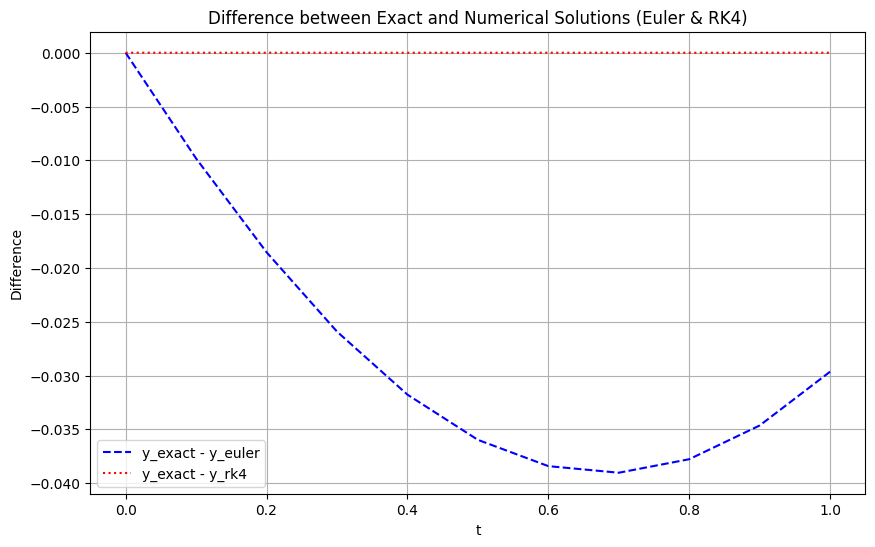

In [7]:
# Plot the differences (y_exact - y_euler) and (y_exact - y_rk4)
plt.figure(figsize=(10,6))

# Plot difference for Euler method
plt.plot(t_euler, diff_euler, label='y_exact - y_euler', color='blue', linestyle='dashed')

# Plot difference for RK4 method
plt.plot(t_rk4, diff_rk4, label='y_exact - y_rk4', color='red', linestyle='dotted')

# Add labels and title
plt.xlabel('t')
plt.ylabel('Difference')
plt.legend()
plt.title('Difference between Exact and Numerical Solutions (Euler & RK4)')

# Show the plot
plt.grid(True)
plt.show()


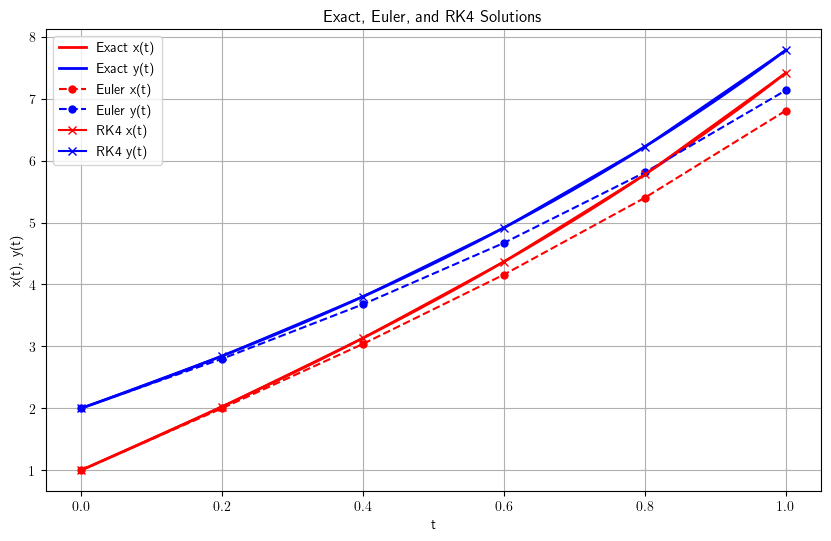

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of ODEs
def f1(t, x, y):
    return -3*x + 4*y

def f2(t, x, y):
    return -2*x + 3*y

# Exact solutions
def exact_x(t):
    return 3*np.exp(t) - 2*np.exp(-t)

def exact_y(t):
    return 3*np.exp(t) - np.exp(-t)

# Euler Method
def euler_method(N, h):
    t_vals = np.linspace(0, 1, N+1)
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    
    # Initial conditions
    x_vals[0] = 1
    y_vals[0] = 2
    
    for i in range(N):
        x_vals[i+1] = x_vals[i] + h * f1(t_vals[i], x_vals[i], y_vals[i])
        y_vals[i+1] = y_vals[i] + h * f2(t_vals[i], x_vals[i], y_vals[i])
    
    return t_vals, x_vals, y_vals

# RK4 Method
def rk4_method(N, h):
    t_vals = np.linspace(0, 1, N+1)
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    
    # Initial conditions
    x_vals[0] = 1
    y_vals[0] = 2
    
    for i in range(N):
        t = t_vals[i]
        x = x_vals[i]
        y = y_vals[i]
        
        k1x = h * f1(t, x, y)
        k1y = h * f2(t, x, y)
        
        k2x = h * f1(t + h/2, x + k1x/2, y + k1y/2)
        k2y = h * f2(t + h/2, x + k1x/2, y + k1y/2)
        
        k3x = h * f1(t + h/2, x + k2x/2, y + k2y/2)
        k3y = h * f2(t + h/2, x + k2x/2, y + k2y/2)
        
        k4x = h * f1(t + h, x + k3x, y + k3y)
        k4y = h * f2(t + h, x + k3x, y + k3y)
        
        x_vals[i+1] = x_vals[i] + (k1x + 2*k2x + 2*k3x + k4x)/6
        y_vals[i+1] = y_vals[i] + (k1y + 2*k2y + 2*k3y + k4y)/6
    
    return t_vals, x_vals, y_vals

# Parameters
N = 5
h = 1.0 / N

# Get the results from Euler and RK4 methods
t_euler, x_euler, y_euler = euler_method(N, h)
t_rk4, x_rk4, y_rk4 = rk4_method(N, h)

# Exact solutions
t_exact = np.linspace(0, 1, 100)
x_exact = exact_x(t_exact)
y_exact = exact_y(t_exact)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t_exact, x_exact, 'r-', label="Exact x(t)", linewidth=2)
plt.plot(t_exact, y_exact, 'b-', label="Exact y(t)", linewidth=2)
plt.plot(t_euler, x_euler, 'ro--', label="Euler x(t)", markersize=5)
plt.plot(t_euler, y_euler, 'bo--', label="Euler y(t)", markersize=5)
plt.plot(t_rk4, x_rk4, 'rx-', label="RK4 x(t)", markersize=6)
plt.plot(t_rk4, y_rk4, 'bx-', label="RK4 y(t)", markersize=6)
plt.xlabel("t")
plt.ylabel("x(t), y(t)")
plt.title("Exact, Euler, and RK4 Solutions")
plt.legend()
plt.grid(True)
plt.show()


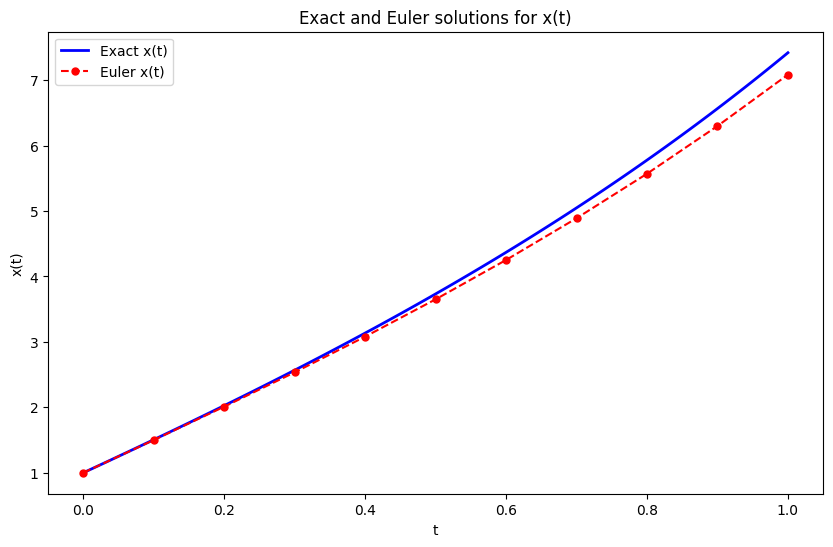

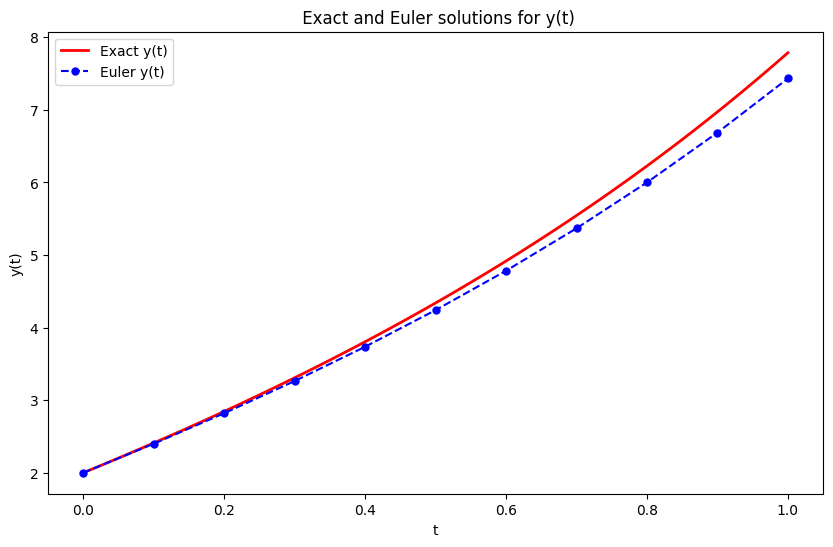

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of ODEs
def f1(t, x, y):
    return -3*x + 4*y

def f2(t, x, y):
    return -2*x + 3*y

# Exact solutions
def exact_x(t):
    return 3*np.exp(t) - 2*np.exp(-t)

def exact_y(t):
    return 3*np.exp(t) - np.exp(-t)

# Euler Method
def euler_method(N, h):
    t_vals = np.linspace(0, 1, N+1)
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    
    # Initial conditions
    x_vals[0] = 1
    y_vals[0] = 2
    
    for i in range(N):
        x_vals[i+1] = x_vals[i] + h * f1(t_vals[i], x_vals[i], y_vals[i])
        y_vals[i+1] = y_vals[i] + h * f2(t_vals[i], x_vals[i], y_vals[i])
    
    return t_vals, x_vals, y_vals

# Parameters
N = 10  # Number of steps
h = 1.0 / N  # Step size

# Get the results from Euler method
t_euler, x_euler, y_euler = euler_method(N, h)

# Exact solutions
t_exact = np.linspace(0, 1, 100)
x_exact = exact_x(t_exact)
y_exact = exact_y(t_exact)

# Plotting the results for x(t)
plt.figure(figsize=(10, 6))
plt.plot(t_exact, x_exact, 'b-', label="Exact x(t)", linewidth=2)
plt.plot(t_euler, x_euler, 'ro--', label="Euler x(t)", markersize=5)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Exact and Euler solutions for x(t)")
plt.legend()
#plt.grid(True)
plt.show()

# Plotting the results for y(t)
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, 'r-', label="Exact y(t)", linewidth=2)
plt.plot(t_euler, y_euler, 'bo--', label="Euler y(t)", markersize=5)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title(" Exact and Euler solutions for y(t)")
plt.legend()
#plt.grid(True)
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the system of ODEs
def f1(t, x, y):
    return -3*x + 4*y

def f2(t, x, y):
    return -2*x + 3*y

# Exact solutions
def exact_x(t):
    return 3*np.exp(t) - 2*np.exp(-t)

def exact_y(t):
    return 3*np.exp(t) - np.exp(-t)

# Euler Method
def euler_method(N, h):
    t_vals = np.linspace(0, 1, N+1)
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    
    # Initial conditions
    x_vals[0] = 1
    y_vals[0] = 2
    
    for i in range(N):
        x_vals[i+1] = x_vals[i] + h * f1(t_vals[i], x_vals[i], y_vals[i])
        y_vals[i+1] = y_vals[i] + h * f2(t_vals[i], x_vals[i], y_vals[i])
    
    return t_vals, x_vals, y_vals

# Parameters
N = 10  # Number of steps
h = 1.0 / N  # Step size

# Get the results from Euler method
t_euler, x_euler, y_euler = euler_method(N, h)

# Exact solutions at the Euler time points
x_exact_euler = exact_x(t_euler)
y_exact_euler = exact_y(t_euler)

# Calculate the differences
x_diff = np.abs(x_exact_euler - x_euler)
y_diff = np.abs(y_exact_euler - y_euler)

# Create a table
data = {
    't': t_euler,
    'x(t)': x_exact_euler,
    'y(t)': y_exact_euler,
    'x_euler(t)': x_euler,
    'y_euler(t)': y_euler,
    '|x(t) - x_euler(t)|': x_diff,
    '|y(t) - y_euler(t)|': y_diff
}

df = pd.DataFrame(data)
print(df)

# Optional: Save the table to a CSV file
df.to_csv('euler_vs_exact.csv', index=False)


      t      x(t)      y(t)  x_euler(t)  y_euler(t)  |x(t) - x_euler(t)|  \
0   0.0  1.000000  2.000000    1.000000    2.000000             0.000000   
1   0.1  1.505838  2.410675    1.500000    2.400000             0.005838   
2   0.2  2.026747  2.845478    2.010000    2.820000             0.016747   
3   0.3  2.567940  3.308758    2.535000    3.264000             0.032940   
4   0.4  3.134834  3.805154    3.080100    3.736200             0.054734   
5   0.5  3.733102  4.339633    3.650550    4.241040             0.082552   
6   0.6  4.368733  4.917545    4.251801    4.783242             0.116932   
7   0.7  5.048088  5.544673    4.889558    5.367854             0.158530   
8   0.8  5.777965  6.227294    5.569832    6.000299             0.208133   
9   0.9  6.565670  6.972240    6.299002    6.686423             0.266668   
10  1.0  7.419087  7.786966    7.083871    7.432549             0.335216   

    |y(t) - y_euler(t)|  
0              0.000000  
1              0.010675  
2        

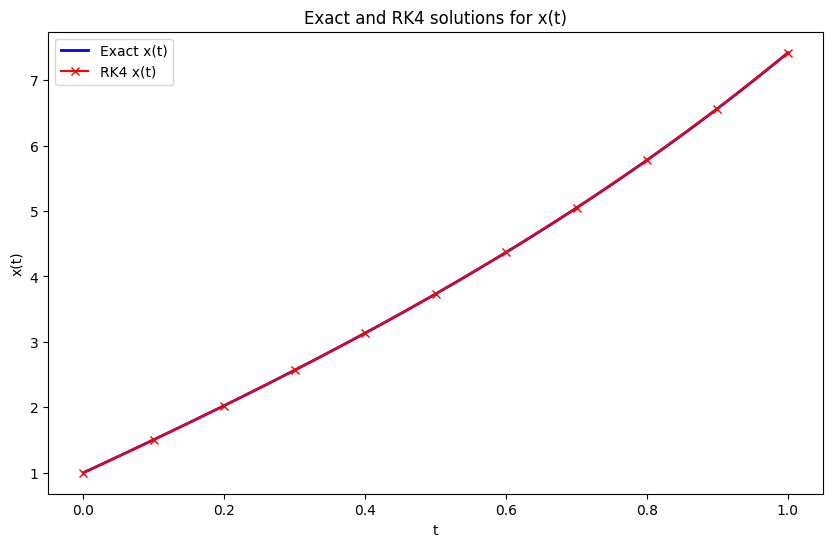

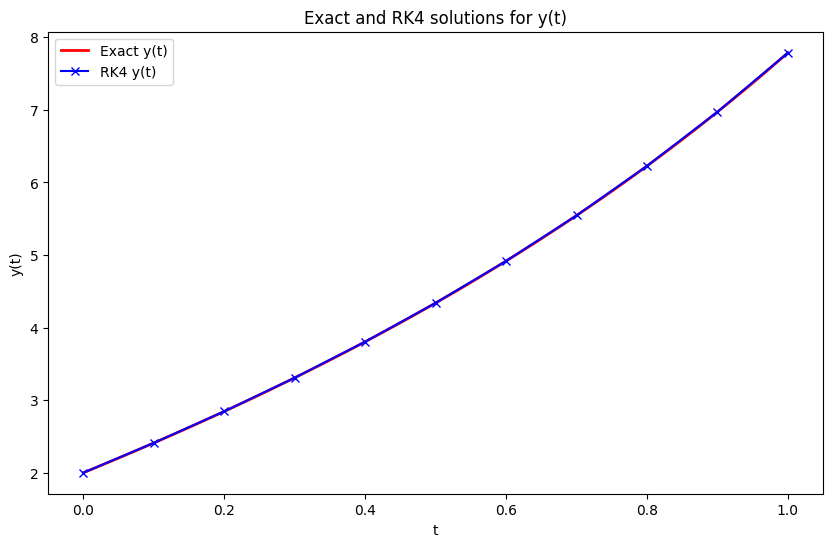

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of ODEs
def f1(t, x, y):
    return -3*x + 4*y

def f2(t, x, y):
    return -2*x + 3*y

# Exact solutions
def exact_x(t):
    return 3*np.exp(t) - 2*np.exp(-t)

def exact_y(t):
    return 3*np.exp(t) - np.exp(-t)

# RK4 Method
def rk4_method(N, h):
    t_vals = np.linspace(0, 1, N+1)
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    
    # Initial conditions
    x_vals[0] = 1
    y_vals[0] = 2
    
    for i in range(N):
        t = t_vals[i]
        x = x_vals[i]
        y = y_vals[i]
        
        k1x = h * f1(t, x, y)
        k1y = h * f2(t, x, y)
        
        k2x = h * f1(t + h/2, x + k1x/2, y + k1y/2)
        k2y = h * f2(t + h/2, x + k1x/2, y + k1y/2)
        
        k3x = h * f1(t + h/2, x + k2x/2, y + k2y/2)
        k3y = h * f2(t + h/2, x + k2x/2, y + k2y/2)
        
        k4x = h * f1(t + h, x + k3x, y + k3y)
        k4y = h * f2(t + h, x + k3x, y + k3y)
        
        x_vals[i+1] = x_vals[i] + (k1x + 2*k2x + 2*k3x + k4x)/6
        y_vals[i+1] = y_vals[i] + (k1y + 2*k2y + 2*k3y + k4y)/6
    
    return t_vals, x_vals, y_vals

# Parameters
N = 10  # Number of steps
h = 1.0 / N  # Step size

# Get the results from the RK4 method
t_rk4, x_rk4, y_rk4 = rk4_method(N, h)

# Exact solutions
t_exact = np.linspace(0, 1, 100)
x_exact = exact_x(t_exact)
y_exact = exact_y(t_exact)

# Plotting the results for x(t)
plt.figure(figsize=(10, 6))
plt.plot(t_exact, x_exact, 'b-', label="Exact x(t)", linewidth=2)
plt.plot(t_rk4, x_rk4, 'rx-', label="RK4 x(t)", markersize=6)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Exact and RK4 solutions for x(t)")
plt.legend()
#plt.grid(True)
plt.show()

# Plotting the results for y(t)
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, 'r-', label="Exact y(t)", linewidth=2)
plt.plot(t_rk4, y_rk4, 'bx-', label="RK4 y(t)", markersize=6)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Exact and RK4 solutions for y(t)")
plt.legend()
#plt.grid(True)
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the system of ODEs
def f1(t, x, y):
    return -3*x + 4*y

def f2(t, x, y):
    return -2*x + 3*y

# Exact solutions
def exact_x(t):
    return 3*np.exp(t) - 2*np.exp(-t)

def exact_y(t):
    return 3*np.exp(t) - np.exp(-t)

# RK4 Method
def rk4_method(N, h):
    t_vals = np.linspace(0, 1, N+1)
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    
    # Initial conditions
    x_vals[0] = 1
    y_vals[0] = 2
    
    for i in range(N):
        t = t_vals[i]
        x = x_vals[i]
        y = y_vals[i]
        
        k1x = h * f1(t, x, y)
        k1y = h * f2(t, x, y)
        
        k2x = h * f1(t + h/2, x + k1x/2, y + k1y/2)
        k2y = h * f2(t + h/2, x + k1x/2, y + k1y/2)
        
        k3x = h * f1(t + h/2, x + k2x/2, y + k2y/2)
        k3y = h * f2(t + h/2, x + k2x/2, y + k2y/2)
        
        k4x = h * f1(t + h, x + k3x, y + k3y)
        k4y = h * f2(t + h, x + k3x, y + k3y)
        
        x_vals[i+1] = x_vals[i] + (k1x + 2*k2x + 2*k3x + k4x)/6
        y_vals[i+1] = y_vals[i] + (k1y + 2*k2y + 2*k3y + k4y)/6
    
    return t_vals, x_vals, y_vals

# Parameters
N = 10  # Number of steps
h = 1.0 / N  # Step size

# Get the results from the RK4 method
t_rk4, x_rk4, y_rk4 = rk4_method(N, h)

# Exact solutions at the RK4 time points
x_exact_rk4 = exact_x(t_rk4)
y_exact_rk4 = exact_y(t_rk4)

# Calculate the differences
x_diff = np.abs(x_exact_rk4 - x_rk4)
y_diff = np.abs(y_exact_rk4 - y_rk4)

# Create a table
data = {
    't': t_rk4,
    'x(t)': x_exact_rk4,
    'y(t)': y_exact_rk4,
    'x_RK4(t)': x_rk4,
    'y_RK4(t)': y_rk4,
    '|x(t) - x_RK4(t)|': x_diff,
    '|y(t) - y_RK4(t)|': y_diff
}

df = pd.DataFrame(data)
print(df)

# Optional: Save the table to a CSV file
df.to_csv('rk4_vs_exact.csv', index=False)


      t      x(t)      y(t)  x_RK4(t)  y_RK4(t)  |x(t) - x_RK4(t)|  \
0   0.0  1.000000  2.000000  1.000000  2.000000       0.000000e+00   
1   0.1  1.505838  2.410675  1.505838  2.410675       4.181550e-07   
2   0.2  2.026747  2.845478  2.026746  2.845477       8.585850e-07   
3   0.3  2.567940  3.308758  2.567939  3.308757       1.334179e-06   
4   0.4  3.134834  3.805154  3.134832  3.805152       1.858445e-06   
5   0.5  3.733102  4.339633  3.733100  4.339631       2.445731e-06   
6   0.6  4.368733  4.917545  4.368730  4.917542       3.111460e-06   
7   0.7  5.048088  5.544673  5.048084  5.544669       3.872381e-06   
8   0.8  5.777965  6.227294  5.777960  6.227289       4.746835e-06   
9   0.9  6.565670  6.972240  6.565664  6.972234       5.755050e-06   
10  1.0  7.419087  7.786966  7.419080  7.786959       6.919454e-06   

    |y(t) - y_RK4(t)|  
0        0.000000e+00  
1        3.361910e-07  
2        7.102567e-07  
3        1.132860e-06  
4        1.615564e-06  
5        2.1710

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the system of ODEs
def f1(t, x, y):
    return -3*x + 4*y

def f2(t, x, y):
    return -2*x + 3*y

# Exact solutions
def exact_x(t):
    return 3*np.exp(t) - 2*np.exp(-t)

def exact_y(t):
    return 3*np.exp(t) - np.exp(-t)

# Euler Method
def euler_method(N, h):
    t_vals = np.linspace(0, 1, N+1)
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    
    # Initial conditions
    x_vals[0] = 1
    y_vals[0] = 2
    
    for i in range(N):
        x_vals[i+1] = x_vals[i] + h * f1(t_vals[i], x_vals[i], y_vals[i])
        y_vals[i+1] = y_vals[i] + h * f2(t_vals[i], x_vals[i], y_vals[i])
    
    return t_vals, x_vals, y_vals

# RK4 Method
def rk4_method(N, h):
    t_vals = np.linspace(0, 1, N+1)
    x_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    
    # Initial conditions
    x_vals[0] = 1
    y_vals[0] = 2
    
    for i in range(N):
        t = t_vals[i]
        x = x_vals[i]
        y = y_vals[i]
        
        k1x = h * f1(t, x, y)
        k1y = h * f2(t, x, y)
        
        k2x = h * f1(t + h/2, x + k1x/2, y + k1y/2)
        k2y = h * f2(t + h/2, x + k1x/2, y + k1y/2)
        
        k3x = h * f1(t + h/2, x + k2x/2, y + k2y/2)
        k3y = h * f2(t + h/2, x + k2x/2, y + k2y/2)
        
        k4x = h * f1(t + h, x + k3x, y + k3y)
        k4y = h * f2(t + h, x + k3x, y + k3y)
        
        x_vals[i+1] = x_vals[i] + (k1x + 2*k2x + 2*k3x + k4x)/6
        y_vals[i+1] = y_vals[i] + (k1y + 2*k2y + 2*k3y + k4y)/6
    
    return t_vals, x_vals, y_vals

# Parameters
N = 10  # Number of steps
h = 1.0 / N  # Step size

# Get the results from Euler and RK4 methods
t_euler, x_euler, y_euler = euler_method(N, h)
t_rk4, x_rk4, y_rk4 = rk4_method(N, h)

# Exact solutions at Euler/RK4 time points
y_exact_at_points = exact_y(t_euler)

# Calculate errors
error_euler = y_exact_at_points - y_euler
error_rk4 = y_exact_at_points - y_rk4

# Create a table
data = {
    't': t_euler,
    'y_exact': y_exact_at_points,
    'y_euler': y_euler,
    'y_RK4': y_rk4,
    'Error (y_exact - y_euler)': error_euler,
    'Error (y_exact - y_RK4)': error_rk4
}

# Display as a table using pandas
df = pd.DataFrame(data)
print(df)

# Optional: save the table to a CSV file
# df.to_csv("error_comparison.csv", index=False)


      t   y_exact   y_euler     y_RK4  Error (y_exact - y_euler)  \
0   0.0  2.000000  2.000000  2.000000                   0.000000   
1   0.1  2.410675  2.400000  2.410675                   0.010675   
2   0.2  2.845478  2.820000  2.845477                   0.025478   
3   0.3  3.308758  3.264000  3.308757                   0.044758   
4   0.4  3.805154  3.736200  3.805152                   0.068954   
5   0.5  4.339633  4.241040  4.339631                   0.098593   
6   0.6  4.917545  4.783242  4.917542                   0.134303   
7   0.7  5.544673  5.367854  5.544669                   0.176818   
8   0.8  6.227294  6.000299  6.227289                   0.226995   
9   0.9  6.972240  6.686423  6.972234                   0.285817   
10  1.0  7.786966  7.432549  7.786959                   0.354417   

    Error (y_exact - y_RK4)  
0              0.000000e+00  
1              3.361910e-07  
2              7.102567e-07  
3              1.132860e-06  
4              1.615564e-06  
5  

In [12]:
def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


def euler(f, t, y, h): 
    return y + h * f(t, y)

|  t   |     y     | 
|:----:|:---------:|
| 0.00 |  1.000000 |
| 0.20 |  1.000000 |
| 0.40 |  1.040000 |
| 0.60 |  1.123200 |
| 0.80 |  1.257984 |
| 1.00 |  1.459261 |


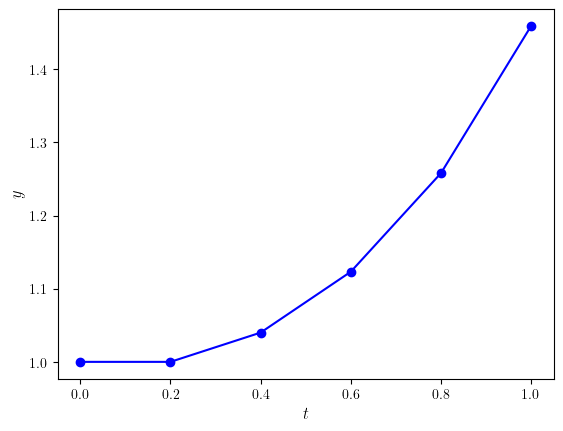

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels

# Define the ODE function
def f(t, y):
    return t * y


# Define IVP parameters
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # initial values
h = 0.2         # step length

# Calculate the solution to the IVP
t, y = solveIVP(f, tspan, y0, h, euler)

# Print table of solution values
print("|  t   |     y     | ")
print("|:----:|:---------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {y[n,0]:9.6f} |")

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y, "bo-", label="Euler")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.show()

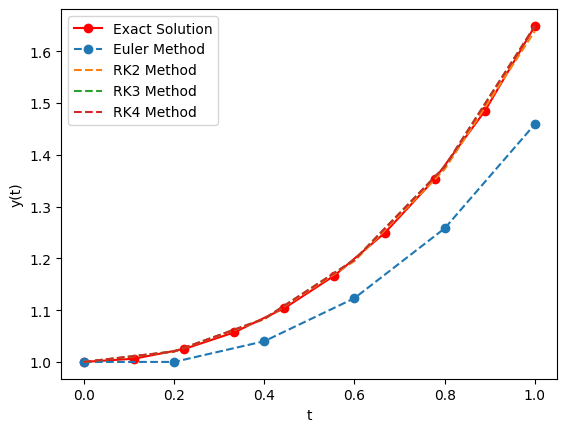

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Exact solution
def exact_solution(t):
    return np.exp(t**2 / 2)

# Derivative function for y' = ty
def f(t, y):
    return t * y

# Euler method
def euler_method(f, t0, y0, h, steps):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for i in range(steps):
        y = y + h * f(t, y)
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# RK2 method (Midpoint)
def rk2_method(f, t0, y0, h, steps):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for i in range(steps):
        k1 = h * f(t, y)
        k2 = h * f(t + h / 2, y + k1 / 2)
        y = y + k2
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# RK3 method
def rk3_method(f, t0, y0, h, steps):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for i in range(steps):
        k1 = h * f(t, y)
        k2 = h * f(t + h / 2, y + k1 / 2)
        k3 = h * f(t + h, y - k1 + 2 * k2)
        y = y + (k1 + 4 * k2 + k3) / 6
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# RK4 method
def rk4_method(f, t0, y0, h, steps):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for i in range(steps):
        k1 = h * f(t, y)
        k2 = h * f(t + h / 2, y + k1 / 2)
        k3 = h * f(t + h / 2, y + k2 / 2)
        k4 = h * f(t + h, y + k3)
        y = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# Parameters
t0 = 0
y0 = 1
h = 0.2
t_end = 1
steps = int((t_end - t0) / h)

# Solve using each method
t_exact = np.linspace(t0, t_end, 10)
y_exact = exact_solution(t_exact)

t_euler, y_euler = euler_method(f, t0, y0, h, steps)
t_rk2, y_rk2 = rk2_method(f, t0, y0, h, steps)
t_rk3, y_rk3 = rk3_method(f, t0, y0, h, steps)
t_rk4, y_rk4 = rk4_method(f, t0, y0, h, steps)

# Plot the results
plt.plot(t_exact, y_exact, label="Exact Solution", color='red',marker='o')
plt.plot(t_euler, y_euler, label="Euler Method", linestyle='--',marker='o')
plt.plot(t_rk2, y_rk2, label="RK2 Method", linestyle='--')
plt.plot(t_rk3, y_rk3, label="RK3 Method", linestyle='--')
plt.plot(t_rk4, y_rk4, label="RK4 Method", linestyle='--')

plt.legend()
plt.xlabel("t")
plt.ylabel("y(t)")
#plt.title("Numerical Methods vs Exact Solution")
#plt.grid(True)
plt.show()


In [11]:
import numpy as np
import pandas as pd

# Exact solution function
def exact_solution(t):
    return np.exp(t**2 / 2)

# Euler method
def euler_method(f, t0, y0, h, steps):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for i in range(steps):
        y = y + h * f(t, y)
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# RK2 method (Midpoint)
def rk2_method(f, t0, y0, h, steps):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for i in range(steps):
        k1 = h * f(t, y)
        k2 = h * f(t + h / 2, y + k1 / 2)
        y = y + k2
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# RK3 method
def rk3_method(f, t0, y0, h, steps):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for i in range(steps):
        k1 = h * f(t, y)
        k2 = h * f(t + h / 2, y + k1 / 2)
        k3 = h * f(t + h, y - k1 + 2 * k2)
        y = y + (k1 + 4 * k2 + k3) / 6
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# RK4 method
def rk4_method(f, t0, y0, h, steps):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for i in range(steps):
        k1 = h * f(t, y)
        k2 = h * f(t + h / 2, y + k1 / 2)
        k3 = h * f(t + h / 2, y + k2 / 2)
        k4 = h * f(t + h, y + k3)
        y = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# Parameters
t0 = 0
y0 = 1
h = 0.2
t_end = 1
steps = int((t_end - t0) / h)

# Solve using each method
t_exact = np.linspace(t0, t_end, steps+1)
y_exact = exact_solution(t_exact)

t_euler, y_euler = euler_method(f, t0, y0, h, steps)
t_rk2, y_rk2 = rk2_method(f, t0, y0, h, steps)
t_rk3, y_rk3 = rk3_method(f, t0, y0, h, steps)
t_rk4, y_rk4 = rk4_method(f, t0, y0, h, steps)

# Compute absolute errors
error_euler = np.abs(y_exact - y_euler)
error_rk2 = np.abs(y_exact - y_rk2)
error_rk3 = np.abs(y_exact - y_rk3)
error_rk4 = np.abs(y_exact - y_rk4)

# Create table of results
data = {
    't': t_exact,
    'Exact y(t)': y_exact,
    '|Exact - Euler|': error_euler,
    '|Exact - RK2|': error_rk2,
    '|Exact - RK3|': error_rk3,
    '|Exact - RK4|': error_rk4
}

df = pd.DataFrame(data)
print(df)


     t  Exact y(t)  |Exact - Euler|  |Exact - RK2|  |Exact - RK3|  \
0  0.0    1.000000         0.000000       0.000000       0.000000   
1  0.2    1.020201         0.020201       0.000201       0.000065   
2  0.4    1.083287         0.043287       0.000863       0.000133   
3  0.6    1.197217         0.074017       0.002221       0.000207   
4  0.8    1.377128         0.119144       0.004794       0.000287   
5  1.0    1.648721         0.189460       0.009606       0.000357   

   |Exact - RK4|  
0   0.000000e+00  
1   6.693422e-09  
2   7.499699e-08  
3   3.552326e-07  
4   1.349057e-06  
5   4.594007e-06  


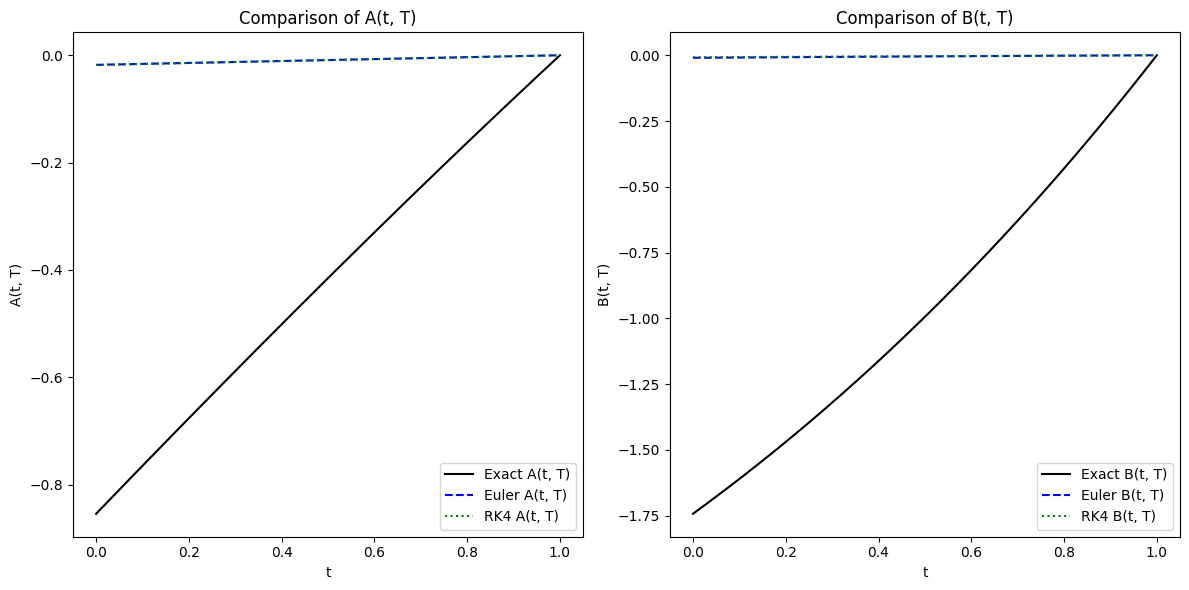

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (adjust as needed)
kappa = 0.5
theta = 0.04
r = 0.03
gamma = 0.6
sigma = 0.2
rho = -0.5
lambda_param = 0.1
T = 1.0  # Terminal time
N = 1000  # Number of time steps
dt = T / N  # Time step size
t_vals = np.linspace(0, T, N)

# Delta and g (from exact solutions)
Delta = kappa - (gamma / (1 - gamma)) * (2 * kappa * rho * sigma * lambda_param + (sigma * lambda_param)**2)
g = (kappa - (gamma / (1 - gamma)) * rho * sigma * lambda_param + np.sqrt(Delta)) / \
    (kappa - (gamma / (1 - gamma)) * rho * sigma * lambda_param - np.sqrt(Delta))

# Exact solutions for A(t, T) and B(t, T) when Delta > 0
def exact_A(t):
    term1 = (kappa * theta) / (sigma**2 * (1 + (gamma / (1 - gamma)) * rho**2))
    term2 = (kappa - (gamma / (1 - gamma)) * rho * sigma * lambda_param + np.sqrt(Delta)) * (T - t)
    term3 = -2 * np.log((1 - g * np.exp(np.sqrt(Delta) * (T - t))) / (1 - g))
    return term1 * term2 + term3 - r * gamma * (T - t)

def exact_B(t):
    term1 = (kappa - (gamma / (1 - gamma)) * rho * sigma * lambda_param + np.sqrt(Delta)) / \
            (sigma**2 * (1 + (gamma / (1 - gamma)) * rho**2))
    term2 = (1 - np.exp(np.sqrt(Delta) * (T - t))) / (1 - g * np.exp(np.sqrt(Delta) * (T - t)))
    return term1 * term2

# Euler's method
def euler_method():
    A = np.zeros(N)
    B = np.zeros(N)
    A[-1] = 0  # A(T, T) = 0
    B[-1] = 0  # B(T, T) = 0
    for i in reversed(range(N - 1)):
        A[i] = A[i + 1] - dt * (kappa * theta * B[i + 1] + r * gamma)
        B[i] = B[i + 1] + dt * (kappa * B[i + 1] - 0.5 * sigma**2 * B[i + 1]**2 + 
                (gamma / (2 * (gamma - 1))) * (lambda_param + rho * sigma * B[i + 1])**2)
    return A, B

# Runge-Kutta 4th Order (RK4)
def rk4_method():
    A = np.zeros(N)
    B = np.zeros(N)
    A[-1] = 0  # A(T, T) = 0
    B[-1] = 0  # B(T, T) = 0
    for i in reversed(range(N - 1)):
        # RK4 for A
        k1_A = -(kappa * theta * B[i] + r * gamma)
        k2_A = -(kappa * theta * (B[i] + 0.5 * dt) + r * gamma)
        k3_A = -(kappa * theta * (B[i] + 0.5 * dt) + r * gamma)
        k4_A = -(kappa * theta * (B[i] + dt) + r * gamma)
        A[i] = A[i + 1] + (dt / 6) * (k1_A + 2 * k2_A + 2 * k3_A + k4_A)

        # RK4 for B
        k1_B = kappa * B[i] - 0.5 * sigma**2 * B[i]**2 + \
               (gamma / (2 * (gamma - 1))) * (lambda_param + rho * sigma * B[i])**2
        k2_B = kappa * (B[i] + 0.5 * dt * k1_B) - 0.5 * sigma**2 * (B[i] + 0.5 * dt * k1_B)**2 + \
               (gamma / (2 * (gamma - 1))) * (lambda_param + rho * sigma * (B[i] + 0.5 * dt * k1_B))**2
        k3_B = kappa * (B[i] + 0.5 * dt * k2_B) - 0.5 * sigma**2 * (B[i] + 0.5 * dt * k2_B)**2 + \
               (gamma / (2 * (gamma - 1))) * (lambda_param + rho * sigma * (B[i] + 0.5 * dt * k2_B))**2
        k4_B = kappa * (B[i] + dt * k3_B) - 0.5 * sigma**2 * (B[i] + dt * k3_B)**2 + \
               (gamma / (2 * (gamma - 1))) * (lambda_param + rho * sigma * (B[i] + dt * k3_B))**2
        B[i] = B[i + 1] + (dt / 6) * (k1_B + 2 * k2_B + 2 * k3_B + k4_B)
    return A, B

# Solve the system using both methods
A_euler, B_euler = euler_method()
A_rk4, B_rk4 = rk4_method()

# Exact solutions
A_exact = np.array([exact_A(t) for t in t_vals])
B_exact = np.array([exact_B(t) for t in t_vals])

# Plot the results
plt.figure(figsize=(12, 6))

# Plot A(t, T)
plt.subplot(1, 2, 1)
plt.plot(t_vals, A_exact, label='Exact A(t, T)', color='black')
plt.plot(t_vals, A_euler, '--', label='Euler A(t, T)', color='blue')
plt.plot(t_vals, A_rk4, ':', label='RK4 A(t, T)', color='green')
plt.title('Comparison of A(t, T)')
plt.xlabel('t')
plt.ylabel('A(t, T)')
plt.legend()

# Plot B(t, T)
plt.subplot(1, 2, 2)
plt.plot(t_vals, B_exact, label='Exact B(t, T)', color='black')
plt.plot(t_vals, B_euler, '--', label='Euler B(t, T)', color='blue')
plt.plot(t_vals, B_rk4, ':', label='RK4 B(t, T)', color='green')
plt.title('Comparison of B(t, T)')
plt.xlabel('t')
plt.ylabel('B(t, T)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of ODEs
def f(t, Y):
    y, u = Y
    dy_dt = u
    du_dt = np.exp(2*t) * np.sin(t) - 2*u + 2*y
    return [dy_dt, du_dt]

# Euler's method
def euler_method(f, t0, y0, u0, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    y_values = [y0]
    u_values = [u0]
    
    y, u = y0, u0
    for t in t_values[:-1]:
        y_new = y + h * u
        u_new = u + h * (np.exp(2*t) * np.sin(t) - 2*u + 2*y)
        
        y_values.append(y_new)
        u_values.append(u_new)
        
        y, u = y_new, u_new
        
    return t_values, np.array(y_values), np.array(u_values)

# RK4 method
def rk4_method(f, t0, y0, u0, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    y_values = [y0]
    u_values = [u0]
    
    y, u = y0, u0
    for t in t_values[:-1]:
        k1y, k1u = h * np.array(f(t, [y, u]))
        k2y, k2u = h * np.array(f(t + h/2, [y + k1y/2, u + k1u/2]))
        k3y, k3u = h * np.array(f(t + h/2, [y + k2y/2, u + k2u/2]))
        k4y, k4u = h * np.array(f(t + h, [y + k3y, u + k3u]))
        
        y_new = y + (k1y + 2*k2y + 2*k3y + k4y) / 6
        u_new = u + (k1u + 2*k2u + 2*k3u + k4u) / 6
        
        y_values.append(y_new)
        u_values.append(u_new)
        
        y, u = y_new, u_new
    
    return t_values, np.array(y_values), np.array(u_values)

# Parameters
t0 = 0
y0 = -0.4
u0 = -0.6
h = 0.1
t_end = 1.0

# Compute Euler and RK4 solutions
t_euler, y_euler, u_euler = euler_method(f, t0, y0, u0, h, t_end)
t_rk4, y_rk4, u_rk4 = rk4_method(f, t0, y0, u0, h, t_end)

# Use solve_ivp to get the "exact" solution (numerical integration)
sol = solve_ivp(f, [t0, t_end], [y0, u0], t_eval=np.arange(t0, t_end + h, h), method='RK45')
t_exact, y_exact = sol.t, sol.y[0]

# Plot the solutions
plt.plot(t_euler, y_euler, 'o-', label="Euler's method")
plt.plot(t_rk4, y_rk4, 's-', label='RK4 method')
plt.plot(t_exact, y_exact, 'k-', label='Exact solution (solve_ivp)', linewidth=2)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Euler, RK4, and Exact Solution')
plt.grid(True)
plt.show()


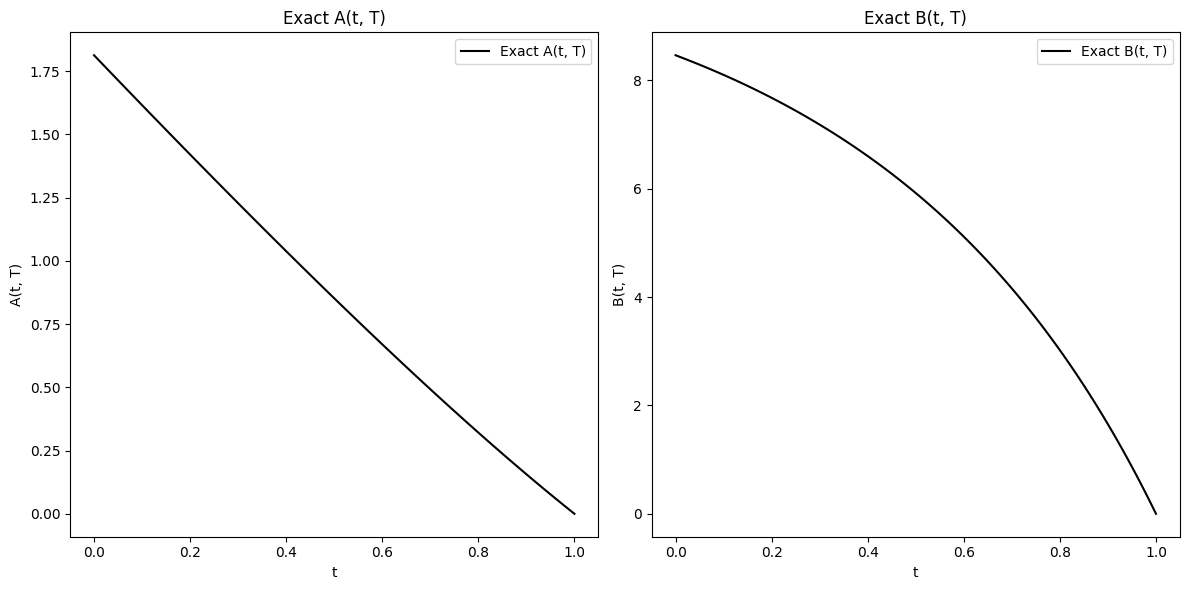

In [14]:
import numpy as np
import matplotlib.pyplot as plt
kappa = 2
theta = 0.04
r = 0.03
gamma = 0.6
sigma = 0.2
rho = 0.5
lambda_param = 0.1

T = 1.0  # Terminal time
N = 100  # Number of time steps
t_vals = np.linspace(0, T, N)

# Delta and g (from exact solutions)
Delta = kappa - (gamma / (1 - gamma)) * (2 * kappa * rho * sigma * lambda_param + (sigma * lambda_param)**2)
g = (kappa - (gamma / (1 - gamma)) * rho * sigma * lambda_param + np.sqrt(Delta)) / \
    (kappa - (gamma / (1 - gamma)) * rho * sigma * lambda_param - np.sqrt(Delta))

# Exact solutions for A(t, T) and B(t, T) when Delta > 0
def exact_A(t):
    term1 = (kappa * theta) / (sigma**2 * (1 + (gamma / (1 - gamma)) * rho**2))
    term2 = (kappa - (gamma / (1 - gamma)) * rho * sigma * lambda_param + np.sqrt(Delta)) * (T - t)
    term3 = -2 * np.log((1 - g * np.exp(np.sqrt(Delta) * (T - t))) / (1 - g))
    return term1 * term2 + term3 - r * gamma * (T - t)

def exact_B(t):
    term1 = (kappa - (gamma / (1 - gamma)) * rho * sigma * lambda_param + np.sqrt(Delta)) / \
            (sigma**2 * (1 + (gamma / (1 - gamma)) * rho**2))
    term2 = (1 - np.exp(np.sqrt(Delta) * (T - t))) / (1 - g * np.exp(np.sqrt(Delta) * (T - t)))
    return term1 * term2

# Exact solutions
A_exact = np.array([exact_A(t) for t in t_vals])
B_exact = np.array([exact_B(t) for t in t_vals])

# Plot the results
plt.figure(figsize=(12, 6))

# Plot A(t, T)
plt.subplot(1, 2, 1)
plt.plot(t_vals, A_exact, label='Exact A(t, T)', color='black')
plt.title('Exact A(t, T)')
plt.xlabel('t')
plt.ylabel('A(t, T)')
plt.legend()

# Plot B(t, T)
plt.subplot(1, 2, 2)
plt.plot(t_vals, B_exact, label='Exact B(t, T)', color='black')
plt.title('Exact B(t, T)')
plt.xlabel('t')
plt.ylabel('B(t, T)')
plt.legend()

plt.tight_layout()
plt.show()


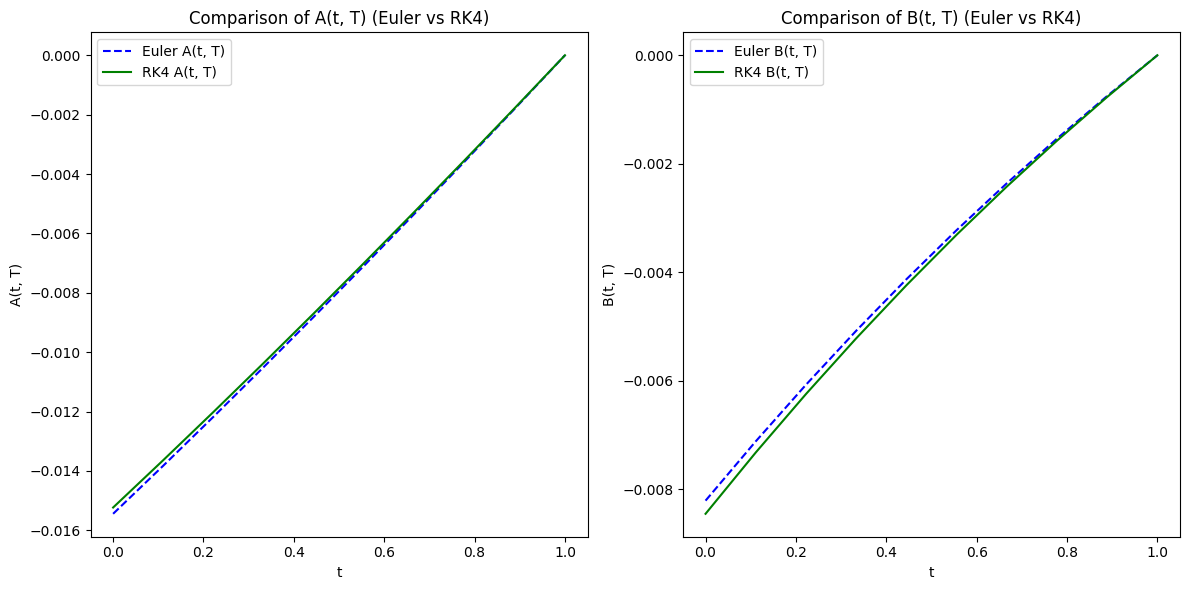

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (adjust as needed)
kappa =0.5
theta = 0.5
sigma = 0.3
rho = 0.4
gamma = 0.6
lambda_param = 0.1
T = 1.0  # Terminal time
N = 10  # Number of time steps
dt = T / N  # Time step size
t_vals = np.linspace(0, T, N)

# Euler method for solving A(t) and B(t)
def euler_method():
    A = np.zeros(N)
    B = np.zeros(N)
    A[-1] = 0  # A(T, T) = 0
    B[-1] = 0  # B(T, T) = 0
    for i in reversed(range(N - 1)):
        A[i] = A[i + 1] - dt * (kappa * theta * B[i + 1] + r * gamma)
        B[i] = B[i + 1] + dt * (kappa * B[i + 1] - 0.5 * sigma**2 * B[i + 1]**2 + 
                (gamma / (2 * (gamma - 1))) * (lambda_param + rho * sigma * B[i + 1])**2)
    return A, B

# RK4 method for solving A(t) and B(t)
def rk4_method():
    A = np.zeros(N)
    B = np.zeros(N)
    A[-1] = 0  # A(T, T) = 0
    B[-1] = 0  # B(T, T) = 0
    for i in reversed(range(N - 1)):
        # For A(t, T)
        k1_A = - (kappa * theta * B[i + 1] + r * gamma)
        k2_A = - (kappa * theta * (B[i + 1] + 0.5 * dt * k1_A) + r * gamma)
        k3_A = - (kappa * theta * (B[i + 1] + 0.5 * dt * k2_A) + r * gamma)
        k4_A = - (kappa * theta * (B[i + 1] + dt * k3_A) + r * gamma)
        A[i] = A[i + 1] + dt / 6 * (k1_A + 2 * k2_A + 2 * k3_A + k4_A)
        
        # For B(t, T)
        k1_B = kappa * B[i + 1] - 0.5 * sigma**2 * B[i + 1]**2 + \
               (gamma / (2 * (gamma - 1))) * (lambda_param + rho * sigma * B[i + 1])**2
        k2_B = kappa * (B[i + 1] + 0.5 * dt * k1_B) - 0.5 * sigma**2 * (B[i + 1] + 0.5 * dt * k1_B)**2 + \
               (gamma / (2 * (gamma - 1))) * (lambda_param + rho * sigma * (B[i + 1] + 0.5 * dt * k1_B))**2
        k3_B = kappa * (B[i + 1] + 0.5 * dt * k2_B) - 0.5 * sigma**2 * (B[i + 1] + 0.5 * dt * k2_B)**2 + \
               (gamma / (2 * (gamma - 1))) * (lambda_param + rho * sigma * (B[i + 1] + 0.5 * dt * k2_B))**2
        k4_B = kappa * (B[i + 1] + dt * k3_B) - 0.5 * sigma**2 * (B[i + 1] + dt * k3_B)**2 + \
               (gamma / (2 * (gamma - 1))) * (lambda_param + rho * sigma * (B[i + 1] + dt * k3_B))**2
        B[i] = B[i + 1] + dt / 6 * (k1_B + 2 * k2_B + 2 * k3_B + k4_B)
    
    return A, B

# Solve using Euler and RK4 methods
A_euler, B_euler = euler_method()
A_rk4, B_rk4 = rk4_method()

# Plot the results
plt.figure(figsize=(12, 6))

# Plot A(t, T)
plt.subplot(1, 2, 1)
plt.plot(t_vals, A_euler, label='Euler A(t, T)', color='blue', linestyle='--')
plt.plot(t_vals, A_rk4, label='RK4 A(t, T)', color='green')
plt.title('Comparison of A(t, T) (Euler vs RK4)')
plt.xlabel('t')
plt.ylabel('A(t, T)')
plt.legend()

# Plot B(t, T)
plt.subplot(1, 2, 2)
plt.plot(t_vals, B_euler, label='Euler B(t, T)', color='blue', linestyle='--')
plt.plot(t_vals, B_rk4, label='RK4 B(t, T)', color='green')
plt.title('Comparison of B(t, T) (Euler vs RK4)')
plt.xlabel('t')
plt.ylabel('B(t, T)')
plt.legend()

plt.tight_layout()
plt.show()


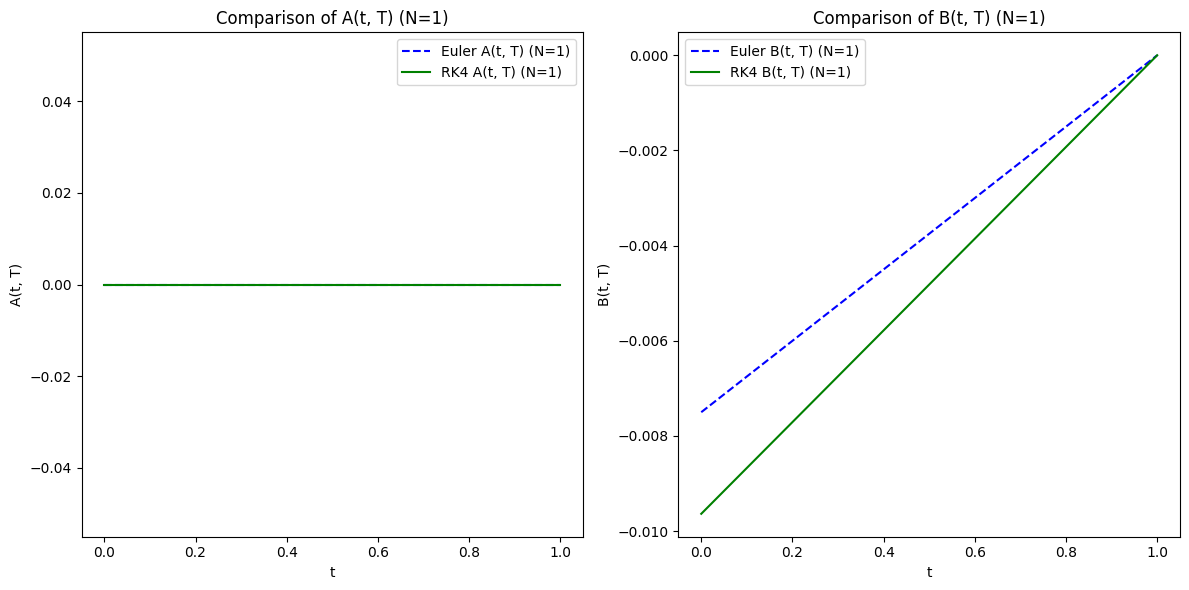

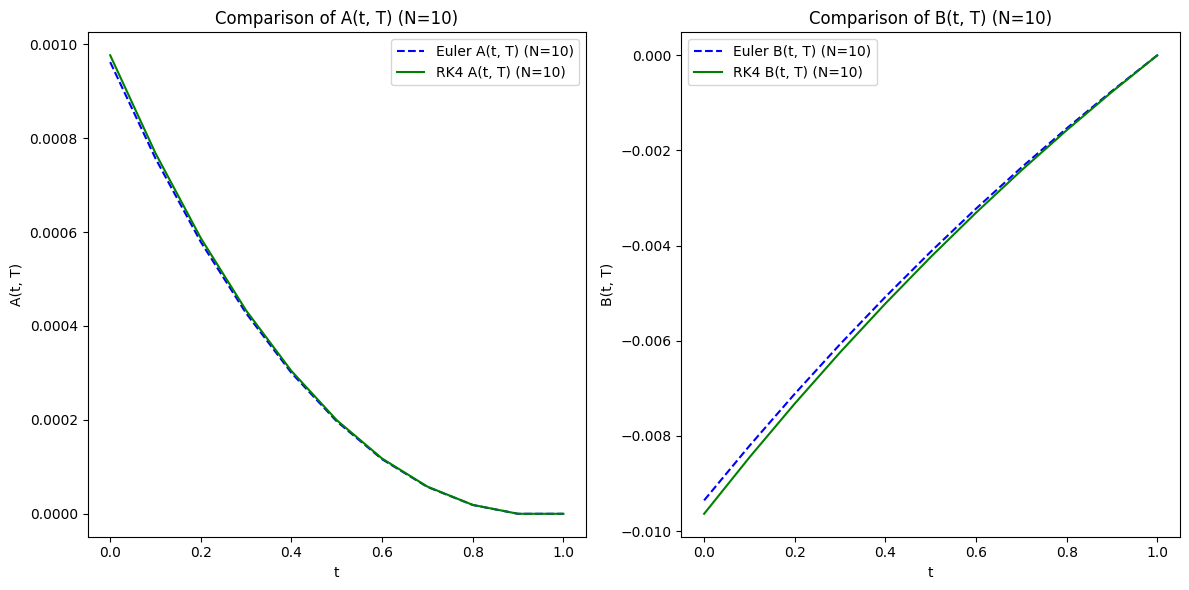

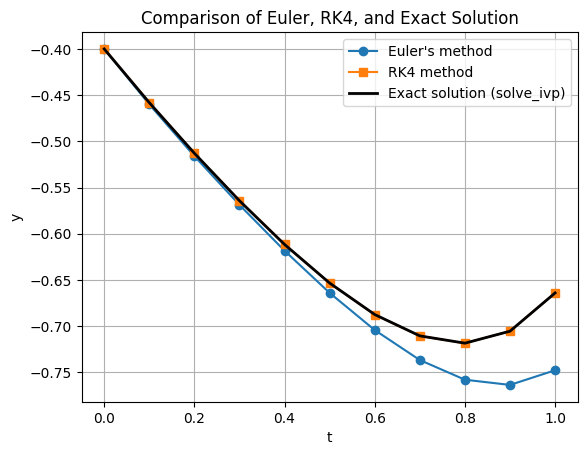

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of ODEs
def f(t, Y):
    y, u = Y
    dy_dt = u
    du_dt = np.exp(2*t) * np.sin(t) - 2*u + 2*y
    return [dy_dt, du_dt]

# Euler's method
def euler_method(f, t0, y0, u0, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    y_values = [y0]
    u_values = [u0]
    
    y, u = y0, u0
    for t in t_values[:-1]:
        y_new = y + h * u
        u_new = u + h * (np.exp(2*t) * np.sin(t) - 2*u + 2*y)
        
        y_values.append(y_new)
        u_values.append(u_new)
        
        y, u = y_new, u_new
        
    return t_values, np.array(y_values), np.array(u_values)

# RK4 method
def rk4_method(f, t0, y0, u0, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    y_values = [y0]
    u_values = [u0]
    
    y, u = y0, u0
    for t in t_values[:-1]:
        k1y, k1u = h * np.array(f(t, [y, u]))
        k2y, k2u = h * np.array(f(t + h/2, [y + k1y/2, u + k1u/2]))
        k3y, k3u = h * np.array(f(t + h/2, [y + k2y/2, u + k2u/2]))
        k4y, k4u = h * np.array(f(t + h, [y + k3y, u + k3u]))
        
        y_new = y + (k1y + 2*k2y + 2*k3y + k4y) / 6
        u_new = u + (k1u + 2*k2u + 2*k3u + k4u) / 6
        
        y_values.append(y_new)
        u_values.append(u_new)
        
        y, u = y_new, u_new
    
    return t_values, np.array(y_values), np.array(u_values)

# Parameters
t0 = 0
y0 = -0.4
u0 = -0.6
h = 0.1
t_end = 1.0

# Compute Euler and RK4 solutions
t_euler, y_euler, u_euler = euler_method(f, t0, y0, u0, h, t_end)
t_rk4, y_rk4, u_rk4 = rk4_method(f, t0, y0, u0, h, t_end)

# Use solve_ivp to get the "exact" solution (numerical integration)
sol = solve_ivp(f, [t0, t_end], [y0, u0], t_eval=np.arange(t0, t_end + h, h), method='RK45')
t_exact, y_exact = sol.t, sol.y[0]

# Plot the solutions
plt.plot(t_euler, y_euler, 'o-', label="Euler's method")
plt.plot(t_rk4, y_rk4, 's-', label='RK4 method')
plt.plot(t_exact, y_exact, 'k-', label='Exact solution (solve_ivp)', linewidth=2)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Euler, RK4, and Exact Solution')
plt.grid(True)
plt.show()


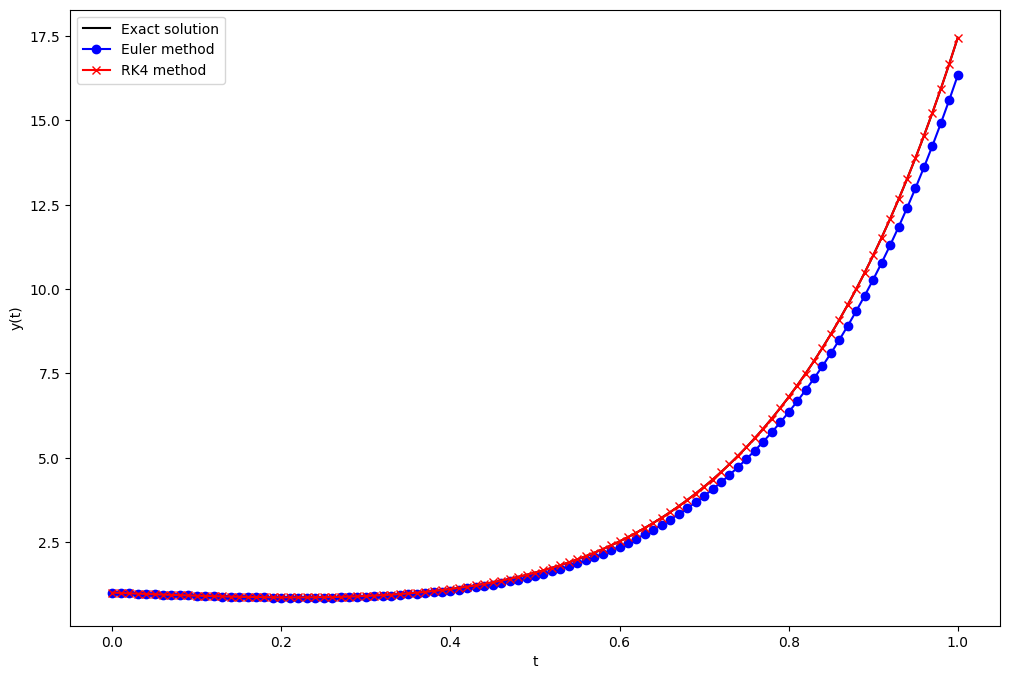

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equations
def f(t, y1, y2):
    return y2, 3*y2 - 2*y1 + 6*np.exp(3*t)

# Exact solution
def exact_solution(t):
    return -8*np.exp(2*t) + 6*np.exp(t) + 3*np.exp(3*t)

# Euler method
def euler_method(N):
    h = 1/N
    t = np.linspace(0, 1, N+1)
    y1 = np.zeros(N+1)
    y2 = np.zeros(N+1)
    y1[0] = 1
    y2[0] = -1
    for n in range(N):
        y1[n+1] = y1[n] + h * y2[n]
        y2[n+1] = y2[n] + h * (3*y2[n] - 2*y1[n] + 6*np.exp(3*t[n]))
    return t, y1, y2

# Runge-Kutta method of order 4
def rk4_method(N):
    h = 1/N
    t = np.linspace(0, 1, N+1)
    y1 = np.zeros(N+1)
    y2 = np.zeros(N+1)
    y1[0] = 1
    y2[0] = -1
    for n in range(N):
        k1y1, k1y2 = f(t[n], y1[n], y2[n])
        k2y1, k2y2 = f(t[n] + h/2, y1[n] + h*k1y1/2, y2[n] + h*k1y2/2)
        k3y1, k3y2 = f(t[n] + h/2, y1[n] + h*k2y1/2, y2[n] + h*k2y2/2)
        k4y1, k4y2 = f(t[n] + h, y1[n] + h*k3y1, y2[n] + h*k3y2)
        y1[n+1] = y1[n] + h/6 * (k1y1 + 2*k2y1 + 2*k3y1 + k4y1)
        y2[n+1] = y2[n] + h/6 * (k1y2 + 2*k2y2 + 2*k3y2 + k4y2)
    return t, y1, y2

# Number of steps
N = 100

# Compute solutions
t_euler, y1_euler, _ = euler_method(N)
t_rk4, y1_rk4, _ = rk4_method(N)
t_exact = np.linspace(0, 1, 100)
y_exact = exact_solution(t_exact)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(t_exact, y_exact, label='Exact solution', color='black')
plt.plot(t_euler, y1_euler, 'o-', label='Euler method', color='blue')
plt.plot(t_rk4, y1_rk4, 'x-', label='RK4 method', color='red')
plt.xlabel('t')
plt.ylabel('y(t)')
#plt.title(' Exact Solution, Euler Method, and RK4 Method')
plt.legend()
#plt.grid()
plt.show()


In [14]:
import numpy as np
import pandas as pd

# Define the differential equations
def f(t, y1, y2):
    return y2, 3*y2 - 2*y1 + 6*np.exp(3*t)

# Exact solution
def exact_solution(t):
    return -8*np.exp(2*t) + 6*np.exp(t) + 3*np.exp(3*t)

# Euler method
def euler_method(N):
    h = 1/N
    t = np.linspace(0, 1, N+1)
    y1 = np.zeros(N+1)
    y2 = np.zeros(N+1)
    y1[0] = 1
    y2[0] = -1
    for n in range(N):
        y1[n+1] = y1[n] + h * y2[n]
        y2[n+1] = y2[n] + h * (3*y2[n] - 2*y1[n] + 6*np.exp(3*t[n]))
    return t, y1

# Runge-Kutta method of order 4
def rk4_method(N):
    h = 1/N
    t = np.linspace(0, 1, N+1)
    y1 = np.zeros(N+1)
    y2 = np.zeros(N+1)
    y1[0] = 1
    y2[0] = -1
    for n in range(N):
        k1y1, k1y2 = f(t[n], y1[n], y2[n])
        k2y1, k2y2 = f(t[n] + h/2, y1[n] + h*k1y1/2, y2[n] + h*k1y2/2)
        k3y1, k3y2 = f(t[n] + h/2, y1[n] + h*k2y1/2, y2[n] + h*k2y2/2)
        k4y1, k4y2 = f(t[n] + h, y1[n] + h*k3y1, y2[n] + h*k3y2)
        y1[n+1] = y1[n] + h/6 * (k1y1 + 2*k2y1 + 2*k3y1 + k4y1)
        y2[n+1] = y2[n] + h/6 * (k1y2 + 2*k2y2 + 2*k3y2 + k4y2)
    return t, y1

# Number of steps
N = 100

# Compute solutions
t_euler, y1_euler = euler_method(N)
t_rk4, y1_rk4 = rk4_method(N)
t_exact = np.linspace(0, 1, 100)
y_exact = exact_solution(t_exact)

# Interpolating exact solution at Euler and RK4 points

y_exact_euler = np.interp(t_euler, t_exact, y_exact)
y_exact_rk4 = np.interp(t_rk4, t_exact, y_exact)

# Compute errors
error_euler = np.abs(y_exact_euler - y1_euler)
error_rk4 = np.abs(y_exact_rk4 - y1_rk4)

# Create a DataFrame to display the results
df = pd.DataFrame({
    't': t_euler,
    'y_exact': y_exact_euler,
    'y_Euler': y1_euler,
    'y_RK4': y1_rk4,
    '|y_exact - y_Euler|': error_euler,
    '|y_exact - y_RK4|': np.interp(t_euler, t_rk4, error_rk4)
})

# Print the DataFrame
print(df)

# Optional: Save the DataFrame to a CSV file
df.to_csv('comparison_table.csv', index=False)


        t    y_exact    y_Euler      y_RK4  |y_exact - y_Euler|  \
0    0.00   1.000000   1.000000   1.000000             0.000000   
1    0.01   0.990054   0.990000   0.990054             0.000054   
2    0.02   0.980233   0.980100   0.980231             0.000133   
3    0.03   0.970560   0.970323   0.970558             0.000237   
4    0.04   0.961062   0.960694   0.961059             0.000368   
..    ...        ...        ...        ...                  ...   
96   0.96  14.545882  13.608151  14.545330             0.937731   
97   0.97  15.228488  14.248643  15.228054             0.979846   
98   0.98  15.939963  14.916316  15.939660             1.023647   
99   0.99  16.681381  15.612184  16.681221             1.069196   
100  1.00  17.453853  16.337294  17.453853             1.116558   

     |y_exact - y_RK4|  
0         0.000000e+00  
1         5.845614e-07  
2         1.403510e-06  
3         2.468763e-06  
4         3.792469e-06  
..                 ...  
96        5.518263e-